In [132]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['font.size'] = 13

In [133]:
matches = spark.read.csv('/home/vivek/543_ipl/matches.csv',inferSchema=True,header=True)
matches.show(n=2,truncate=True,vertical=True)

-RECORD 0-------------------------------
 id              | 1                    
 season          | 2017                 
 city            | Hyderabad            
 date            | 2017-04-05 00:00:00  
 team1           | Sunrisers Hyderabad  
 team2           | Royal Challengers... 
 toss_winner     | Royal Challengers... 
 toss_decision   | field                
 result          | normal               
 dl_applied      | 0                    
 winner          | Sunrisers Hyderabad  
 win_by_runs     | 35                   
 win_by_wickets  | 0                    
 player_of_match | Yuvraj Singh         
 venue           | Rajiv Gandhi Inte... 
 umpire1         | AY Dandekar          
 umpire2         | NJ Llong             
 umpire3         | null                 
-RECORD 1-------------------------------
 id              | 2                    
 season          | 2017                 
 city            | Pune                 
 date            | 2017-04-06 00:00:00  
 team1          

In [134]:
deliveries = spark.read.csv('/home/vivek/543_ipl/deliveries.csv',inferSchema=True,header=True)
deliveries.show(n=2,truncate=True,vertical=True)

-RECORD 0--------------------------------
 match_id         | 1                    
 inning           | 1                    
 batting_team     | Sunrisers Hyderabad  
 bowling_team     | Royal Challengers... 
 over             | 1                    
 ball             | 1                    
 batsman          | DA Warner            
 non_striker      | S Dhawan             
 bowler           | TS Mills             
 is_super_over    | 0                    
 wide_runs        | 0                    
 bye_runs         | 0                    
 legbye_runs      | 0                    
 noball_runs      | 0                    
 penalty_runs     | 0                    
 batsman_runs     | 0                    
 extra_runs       | 0                    
 total_runs       | 0                    
 player_dismissed | null                 
 dismissal_kind   | null                 
 fielder          | null                 
-RECORD 1--------------------------------
 match_id         | 1             

In [135]:
matches.select('id','team1','team2','toss_winner','toss_decision','winner').show()

+---+--------------------+--------------------+--------------------+-------------+--------------------+
| id|               team1|               team2|         toss_winner|toss_decision|              winner|
+---+--------------------+--------------------+--------------------+-------------+--------------------+
|  1| Sunrisers Hyderabad|Royal Challengers...|Royal Challengers...|        field| Sunrisers Hyderabad|
|  2|      Mumbai Indians|Rising Pune Super...|Rising Pune Super...|        field|Rising Pune Super...|
|  3|       Gujarat Lions|Kolkata Knight Ri...|Kolkata Knight Ri...|        field|Kolkata Knight Ri...|
|  4|Rising Pune Super...|     Kings XI Punjab|     Kings XI Punjab|        field|     Kings XI Punjab|
|  5|Royal Challengers...|    Delhi Daredevils|Royal Challengers...|          bat|Royal Challengers...|
|  6|       Gujarat Lions| Sunrisers Hyderabad| Sunrisers Hyderabad|        field| Sunrisers Hyderabad|
|  7|Kolkata Knight Ri...|      Mumbai Indians|      Mumbai Indi

In [136]:
matches.describe('win_by_runs').show()

+-------+------------------+
|summary|       win_by_runs|
+-------+------------------+
|  count|               636|
|   mean|13.682389937106919|
| stddev| 23.90887697192685|
|    min|                 0|
|    max|               146|
+-------+------------------+



In [137]:
matches.describe('win_by_wickets').show()

+-------+------------------+
|summary|    win_by_wickets|
+-------+------------------+
|  count|               636|
|   mean|3.3726415094339623|
| stddev| 3.420338419104663|
|    min|                 0|
|    max|                10|
+-------+------------------+



## Data Cleaning

In [138]:
matches = matches.drop("umpire3") # As all the values were null
deliveries = deliveries.fillna(0); # Replacing all the values which are Nan with 0

In [139]:
old_team_names = matches.select("team1").distinct().rdd.flatMap(lambda x: x).collect()
old_team_names

['Sunrisers Hyderabad',
 'Chennai Super Kings',
 'Rising Pune Supergiant',
 'Deccan Chargers',
 'Kochi Tuskers Kerala',
 'Rajasthan Royals',
 'Gujarat Lions',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Rising Pune Supergiants',
 'Kings XI Punjab',
 'Pune Warriors',
 'Delhi Daredevils',
 'Mumbai Indians']

In [140]:
new_team_names = ['SRH','CSK','RPS','DC','KTK','RR','GL','RCB','KKL','RPS','KXIP','PW','DD','MI']

In [141]:
matches = matches.replace(old_team_names,new_team_names)

## Basic Analysis

In [142]:
print("Total number of matches :",matches.count())
print("\nTotal number of deliveries :",deliveries.count())
print("\nDifferent Stadium Venues matches were played at:") 
for x in matches.select('venue').distinct().rdd.flatMap(lambda x: x).collect():
    print(x, end=', ')
print("\n\nDifferent Cities matches were played in:") 
for x in matches.select('city').distinct().rdd.flatMap(lambda x: x).collect():
    print(x, end=', ')
print("\n\nTeams :",)
for x in old_team_names:
    print (x,end=', ')
print("\n\nTotal umpires used in IPL till now :", matches.select('umpire1').distinct().count())

Total number of matches : 636

Total number of deliveries : 150460

Different Stadium Venues matches were played at:
Dubai International Cricket Stadium, Himachal Pradesh Cricket Association Stadium, Sardar Patel Stadium, Motera, Punjab Cricket Association Stadium, Mohali, Barabati Stadium, Punjab Cricket Association IS Bindra Stadium, Mohali, Nehru Stadium, Maharashtra Cricket Association Stadium, Eden Gardens, OUTsurance Oval, M Chinnaswamy Stadium, Feroz Shah Kotla, Rajiv Gandhi International Stadium, Uppal, Brabourne Stadium, Vidarbha Cricket Association Stadium, Jamtha, Green Park, Holkar Cricket Stadium, Shaheed Veer Narayan Singh International Stadium, Sheikh Zayed Stadium, Sharjah Cricket Stadium, St George's Park, Wankhede Stadium, Newlands, JSCA International Stadium Complex, Saurashtra Cricket Association Stadium, Dr DY Patil Sports Academy, Buffalo Park, New Wanderers Stadium, SuperSport Park, Sawai Mansingh Stadium, Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, MA C

## Total number of matches at each venue

In [143]:
matches.registerTempTable('venue')
venue = sqlContext.sql('Select distinct(venue),count(*) as no_of_matches from venue group by venue')
venue.show()

+--------------------+-------------+
|               venue|no_of_matches|
+--------------------+-------------+
|Dubai Internation...|            7|
|Himachal Pradesh ...|            9|
|Sardar Patel Stad...|           12|
|Punjab Cricket As...|           35|
|    Barabati Stadium|            7|
|Punjab Cricket As...|           11|
|       Nehru Stadium|            5|
|Maharashtra Crick...|           15|
|        Eden Gardens|           61|
|     OUTsurance Oval|            2|
|M Chinnaswamy Sta...|           66|
|    Feroz Shah Kotla|           60|
|Rajiv Gandhi Inte...|           49|
|   Brabourne Stadium|           11|
|Vidarbha Cricket ...|            3|
|          Green Park|            4|
|Holkar Cricket St...|            5|
|Shaheed Veer Nara...|            6|
|Sheikh Zayed Stadium|            7|
|Sharjah Cricket S...|            6|
+--------------------+-------------+
only showing top 20 rows



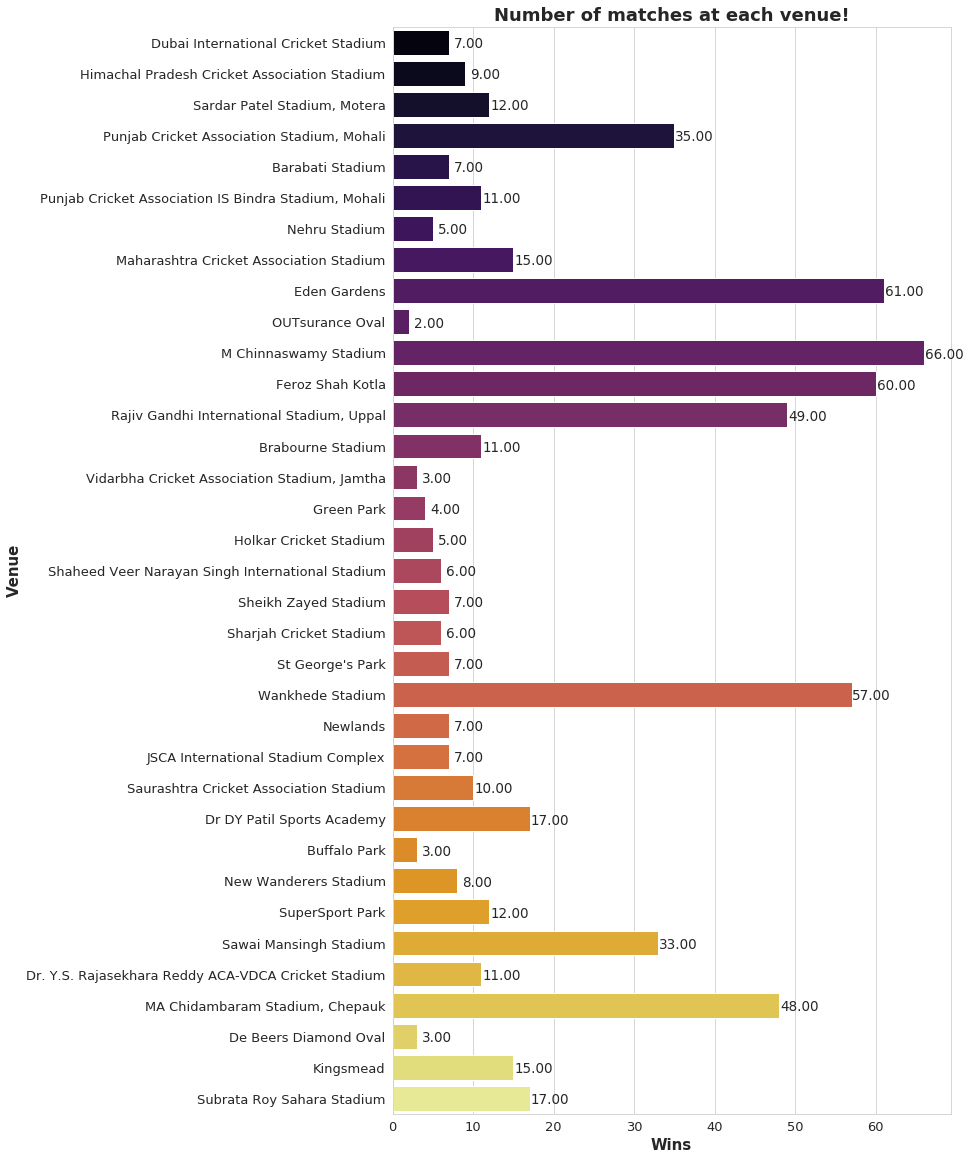

In [144]:
fig, ax = plt.subplots(figsize=(10,20))
ax = sns.barplot("no_of_matches", y="venue", data=venue.toPandas(),palette='inferno')
ax.set_xlabel('Wins',fontsize = 15,weight = "heavy")
ax.set_ylabel('Venue',fontsize = 15,weight = "heavy")
ax.set_title('Number of matches at each venue!', fontsize = 18,weight = "heavy")
for p in ax.patches:
    width = p.get_width()
    plt.text(2.5+width, p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center',fontsize=13.5)

## Total number of wins at each venue, by batting first

In [145]:
bat_first = matches.filter(matches.win_by_runs > 0)
bat_first.registerTempTable('bat_first')
bat_first = sqlContext.sql('Select distinct(venue),count(*) as wins_batting_first from bat_first group by venue')
bat_first.show()

+--------------------+------------------+
|               venue|wins_batting_first|
+--------------------+------------------+
|Dubai Internation...|                 3|
|Himachal Pradesh ...|                 5|
|Sardar Patel Stad...|                 6|
|Punjab Cricket As...|                15|
|    Barabati Stadium|                 4|
|Punjab Cricket As...|                 5|
|       Nehru Stadium|                 3|
|Maharashtra Crick...|                 5|
|        Eden Gardens|                25|
|     OUTsurance Oval|                 1|
|M Chinnaswamy Sta...|                27|
|    Feroz Shah Kotla|                28|
|Rajiv Gandhi Inte...|                20|
|   Brabourne Stadium|                 6|
|Vidarbha Cricket ...|                 2|
|Shaheed Veer Nara...|                 2|
|Sheikh Zayed Stadium|                 3|
|Sharjah Cricket S...|                 2|
|    St George's Park|                 3|
|    Wankhede Stadium|                29|
+--------------------+------------

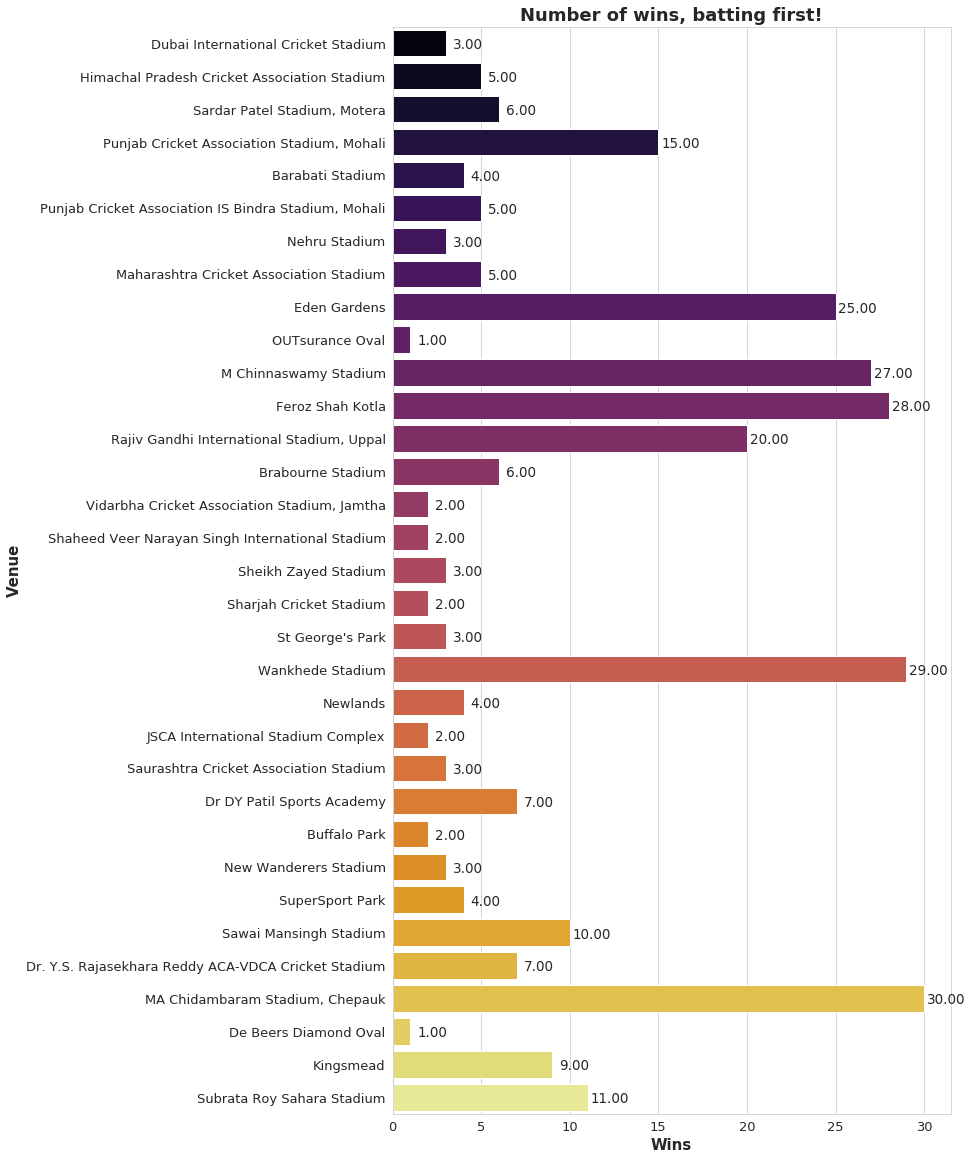

In [146]:
fig, ax = plt.subplots(figsize=(10,20))
ax = sns.barplot("wins_batting_first", y="venue", data=bat_first.toPandas(),palette='inferno')
ax.set_xlabel('Wins',fontsize = 15,weight = "heavy")
ax.set_ylabel('Venue',fontsize = 15,weight = "heavy")
ax.set_title('Number of wins, batting first!', fontsize = 18,weight = "heavy")
for p in ax.patches:
    width = p.get_width()
    plt.text(1.25+width, p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center',fontsize=13.5)

## Percentage of wins by batting first at each venue

In [147]:
bat_first_p = sqlContext.sql('Select t1.venue, t1.no_of_matches, \
nvl(t2.wins_batting_first,0) as wins_batting_first, \
nvl(t2.wins_batting_first / t1.no_of_matches * 100,0) as percent from \
(Select distinct(venue),count(*) as no_of_matches from venue group by venue)t1 \
left join (Select distinct(venue),count(*) as wins_batting_first from bat_first group by venue)t2 \
on t1.venue = t2.venue')
bat_first_p.show()

+--------------------+-------------+------------------+------------------+
|               venue|no_of_matches|wins_batting_first|           percent|
+--------------------+-------------+------------------+------------------+
|Dubai Internation...|            7|                 3|42.857142857142854|
|Himachal Pradesh ...|            9|                 5| 55.55555555555556|
|Sardar Patel Stad...|           12|                 6|              50.0|
|Punjab Cricket As...|           35|                15|42.857142857142854|
|    Barabati Stadium|            7|                 4| 57.14285714285714|
|Punjab Cricket As...|           11|                 5| 45.45454545454545|
|       Nehru Stadium|            5|                 3|              60.0|
|Maharashtra Crick...|           15|                 5| 33.33333333333333|
|        Eden Gardens|           61|                25| 40.98360655737705|
|     OUTsurance Oval|            2|                 1|              50.0|
|M Chinnaswamy Sta...|   

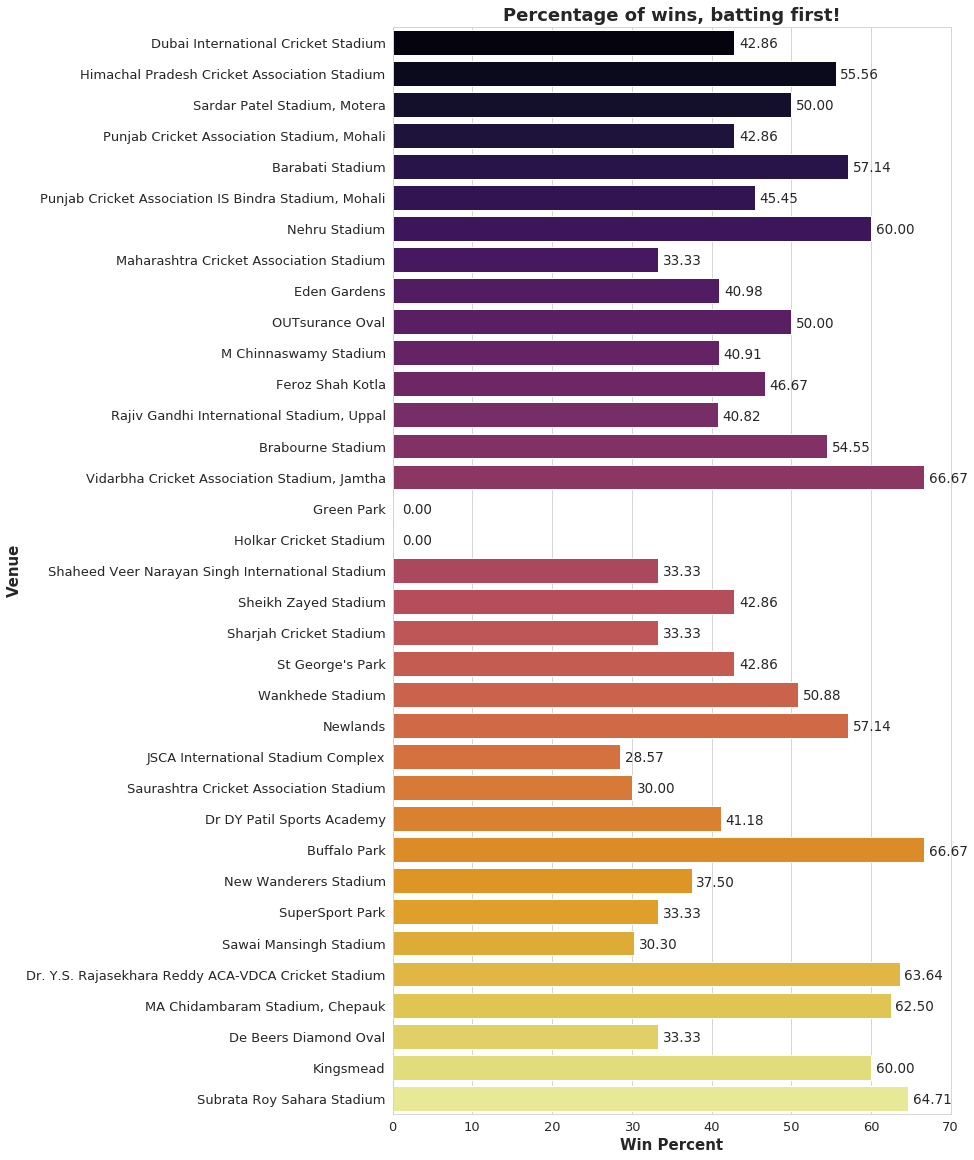

In [148]:
fig, ax = plt.subplots(figsize=(10,20))
ax = sns.barplot("percent", y="venue", data=bat_first_p.toPandas(),palette='inferno')
ax.set_xlabel('Win Percent',fontsize = 15,weight="heavy")
ax.set_ylabel('Venue',fontsize = 15,weight="heavy")
ax.set_title('Percentage of wins, batting first!', fontsize = 18,weight="heavy")
for p in ax.patches:
    width = p.get_width()
    plt.text(3+width, p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center',fontsize=13.5)

## Total number of wins at each venue, by bowling first

In [149]:
bowl_first = matches.filter(matches.win_by_wickets > 0)
bowl_first.registerTempTable('bowl_first')
bowl_first = sqlContext.sql('Select distinct(venue),count(*) as wins_bowling_first from bowl_first group by venue')
bowl_first.show()

+--------------------+------------------+
|               venue|wins_bowling_first|
+--------------------+------------------+
|Dubai Internation...|                 4|
|Himachal Pradesh ...|                 4|
|Sardar Patel Stad...|                 5|
|Punjab Cricket As...|                20|
|    Barabati Stadium|                 3|
|Punjab Cricket As...|                 6|
|       Nehru Stadium|                 2|
|Maharashtra Crick...|                10|
|        Eden Gardens|                36|
|     OUTsurance Oval|                 1|
|M Chinnaswamy Sta...|                36|
|    Feroz Shah Kotla|                31|
|Rajiv Gandhi Inte...|                28|
|   Brabourne Stadium|                 5|
|Vidarbha Cricket ...|                 1|
|          Green Park|                 4|
|Holkar Cricket St...|                 5|
|Shaheed Veer Nara...|                 4|
|Sharjah Cricket S...|                 4|
|Sheikh Zayed Stadium|                 3|
+--------------------+------------

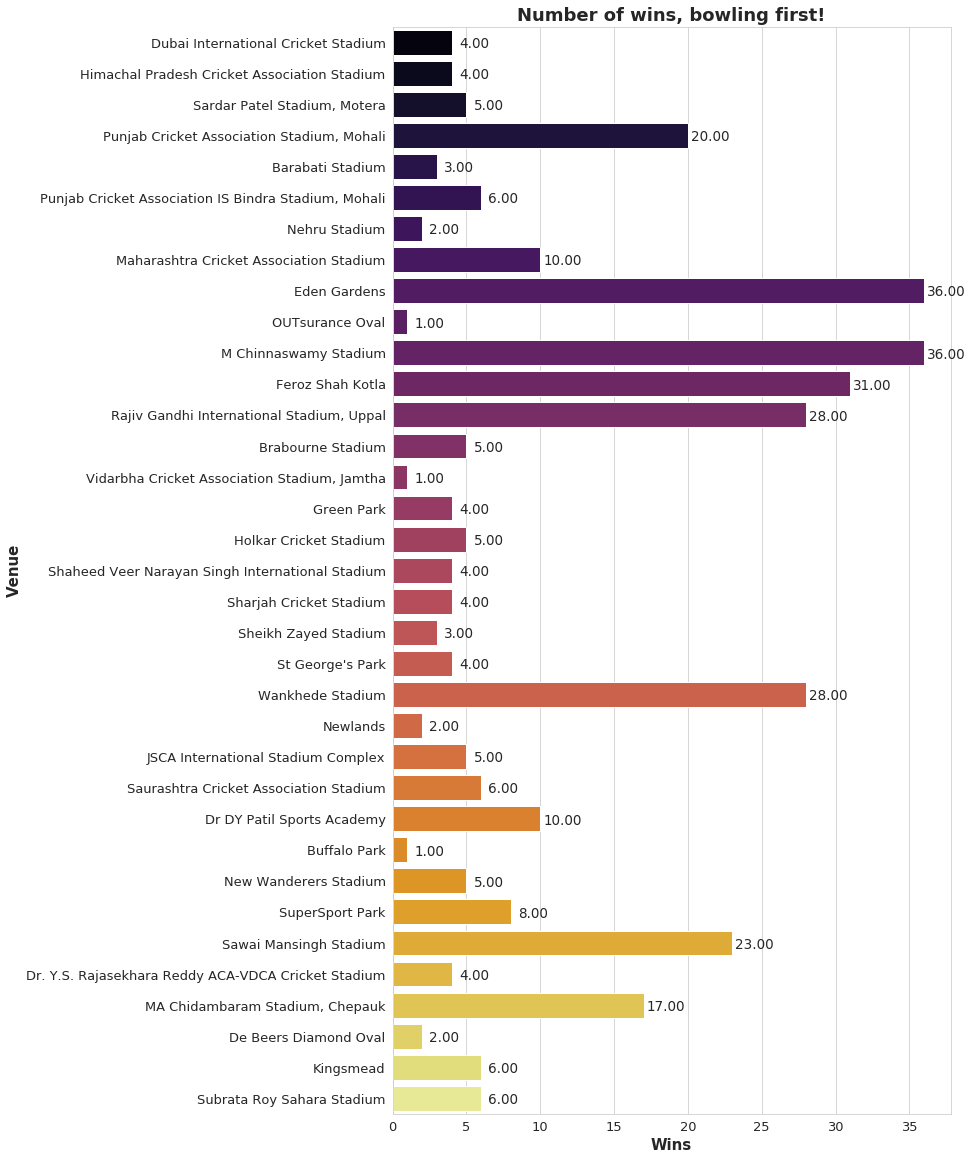

In [150]:
fig, ax = plt.subplots(figsize=(10,20))
ax = sns.barplot("wins_bowling_first", y="venue", data=bowl_first.toPandas(),palette='inferno')
ax.set_xlabel('Wins',fontsize = 15,weight="heavy")
ax.set_ylabel('Venue',fontsize = 15,weight="heavy")
ax.set_title('Number of wins, bowling first!', fontsize = 18,weight="heavy")
for p in ax.patches:
    width = p.get_width()
    plt.text(1.5+width, p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center',fontsize=13.5)

## Percentage of wins by bowling first at each venue

In [151]:
bowl_first_p = sqlContext.sql('Select t1.venue, t1.no_of_matches, t2.wins_bowling_first, \
t2.wins_bowling_first / t1.no_of_matches * 100 as percent from \
(Select distinct(venue),count(*) as no_of_matches from venue group by venue)t1 \
left join (Select distinct(venue),count(*) as wins_bowling_first from bowl_first group by venue)t2 \
on t1.venue = t2.venue')
bowl_first_p.show()

+--------------------+-------------+------------------+------------------+
|               venue|no_of_matches|wins_bowling_first|           percent|
+--------------------+-------------+------------------+------------------+
|Dubai Internation...|            7|                 4| 57.14285714285714|
|Himachal Pradesh ...|            9|                 4| 44.44444444444444|
|Sardar Patel Stad...|           12|                 5| 41.66666666666667|
|Punjab Cricket As...|           35|                20| 57.14285714285714|
|    Barabati Stadium|            7|                 3|42.857142857142854|
|Punjab Cricket As...|           11|                 6| 54.54545454545454|
|       Nehru Stadium|            5|                 2|              40.0|
|Maharashtra Crick...|           15|                10| 66.66666666666666|
|        Eden Gardens|           61|                36| 59.01639344262295|
|     OUTsurance Oval|            2|                 1|              50.0|
|M Chinnaswamy Sta...|   

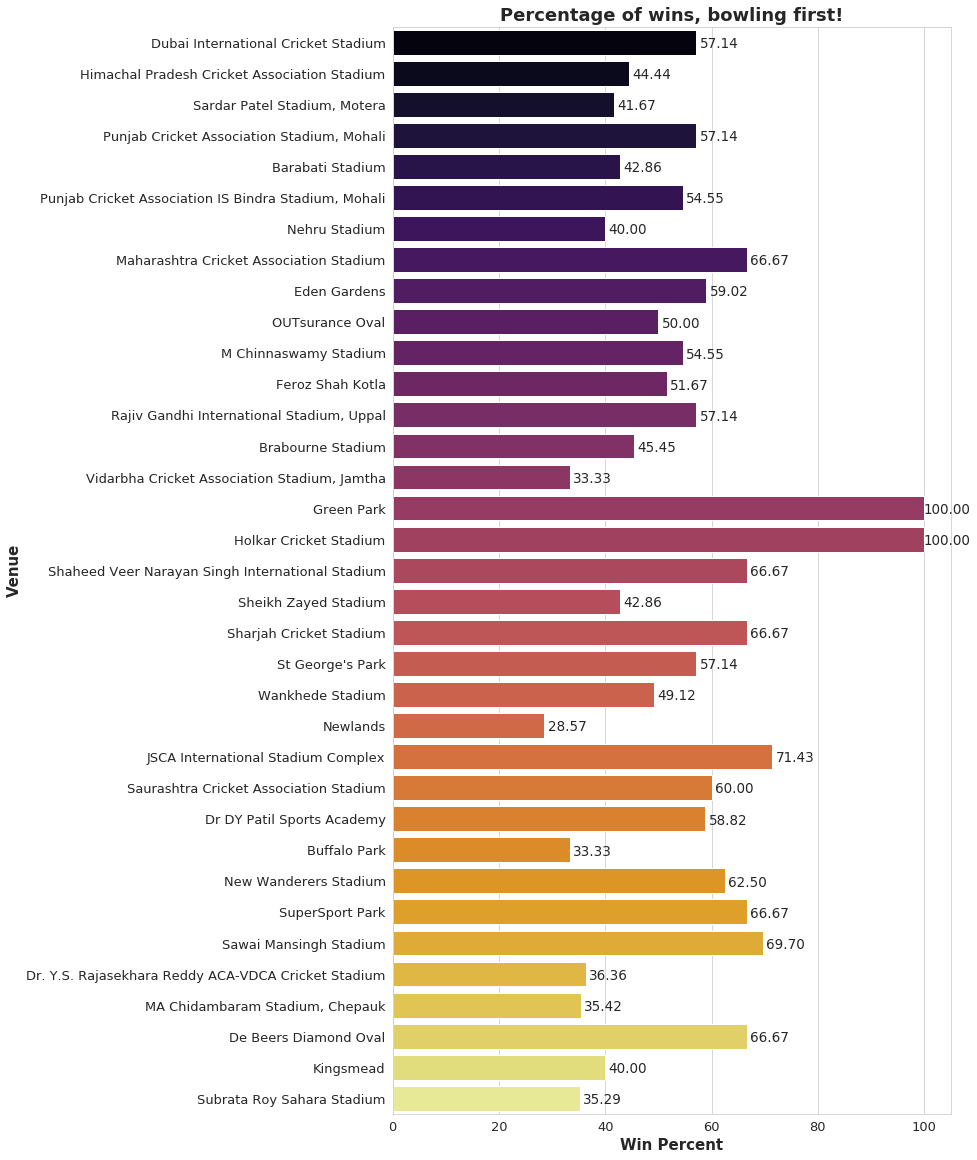

In [152]:
fig, ax = plt.subplots(figsize=(10,20))
ax = sns.barplot("percent", y="venue", data=bowl_first_p.toPandas(),palette='inferno')
ax.set_xlabel('Win Percent',fontsize = 15,weight="heavy")
ax.set_ylabel('Venue',fontsize = 15,weight="heavy")
ax.set_title('Percentage of wins, bowling first!', fontsize = 18,weight="heavy")
for p in ax.patches:
    width = p.get_width()
    plt.text(4.25+width, p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center',fontsize=13.5)

## Type of wins at each stadium - By batting first / Bowling first

In [153]:
first_by = sqlContext.sql('select team1,team2,toss_decision,winner,venue,\
case when win_by_runs > 0 then \'bat\'  when win_by_wickets > 0 then \'bowl\' else \'tie\' end as first \
from venue')
first_by.show()

+-----+-----+-------------+------+--------------------+-----+
|team1|team2|toss_decision|winner|               venue|first|
+-----+-----+-------------+------+--------------------+-----+
|  SRH|  RCB|        field|   SRH|Rajiv Gandhi Inte...|  bat|
|   MI|  RPS|        field|   RPS|Maharashtra Crick...| bowl|
|   GL|  KKL|        field|   KKL|Saurashtra Cricke...| bowl|
|  RPS| KXIP|        field|  KXIP|Holkar Cricket St...| bowl|
|  RCB|   DD|          bat|   RCB|M Chinnaswamy Sta...|  bat|
|   GL|  SRH|        field|   SRH|Rajiv Gandhi Inte...| bowl|
|  KKL|   MI|        field|    MI|    Wankhede Stadium| bowl|
|  RCB| KXIP|          bat|  KXIP|Holkar Cricket St...| bowl|
|   DD|  RPS|        field|    DD|Maharashtra Crick...|  bat|
|  SRH|   MI|        field|    MI|    Wankhede Stadium| bowl|
| KXIP|  KKL|        field|   KKL|        Eden Gardens| bowl|
|  RCB|   MI|        field|    MI|M Chinnaswamy Sta...| bowl|
|  RPS|   GL|        field|    GL|Saurashtra Cricke...| bowl|
|  KKL| 

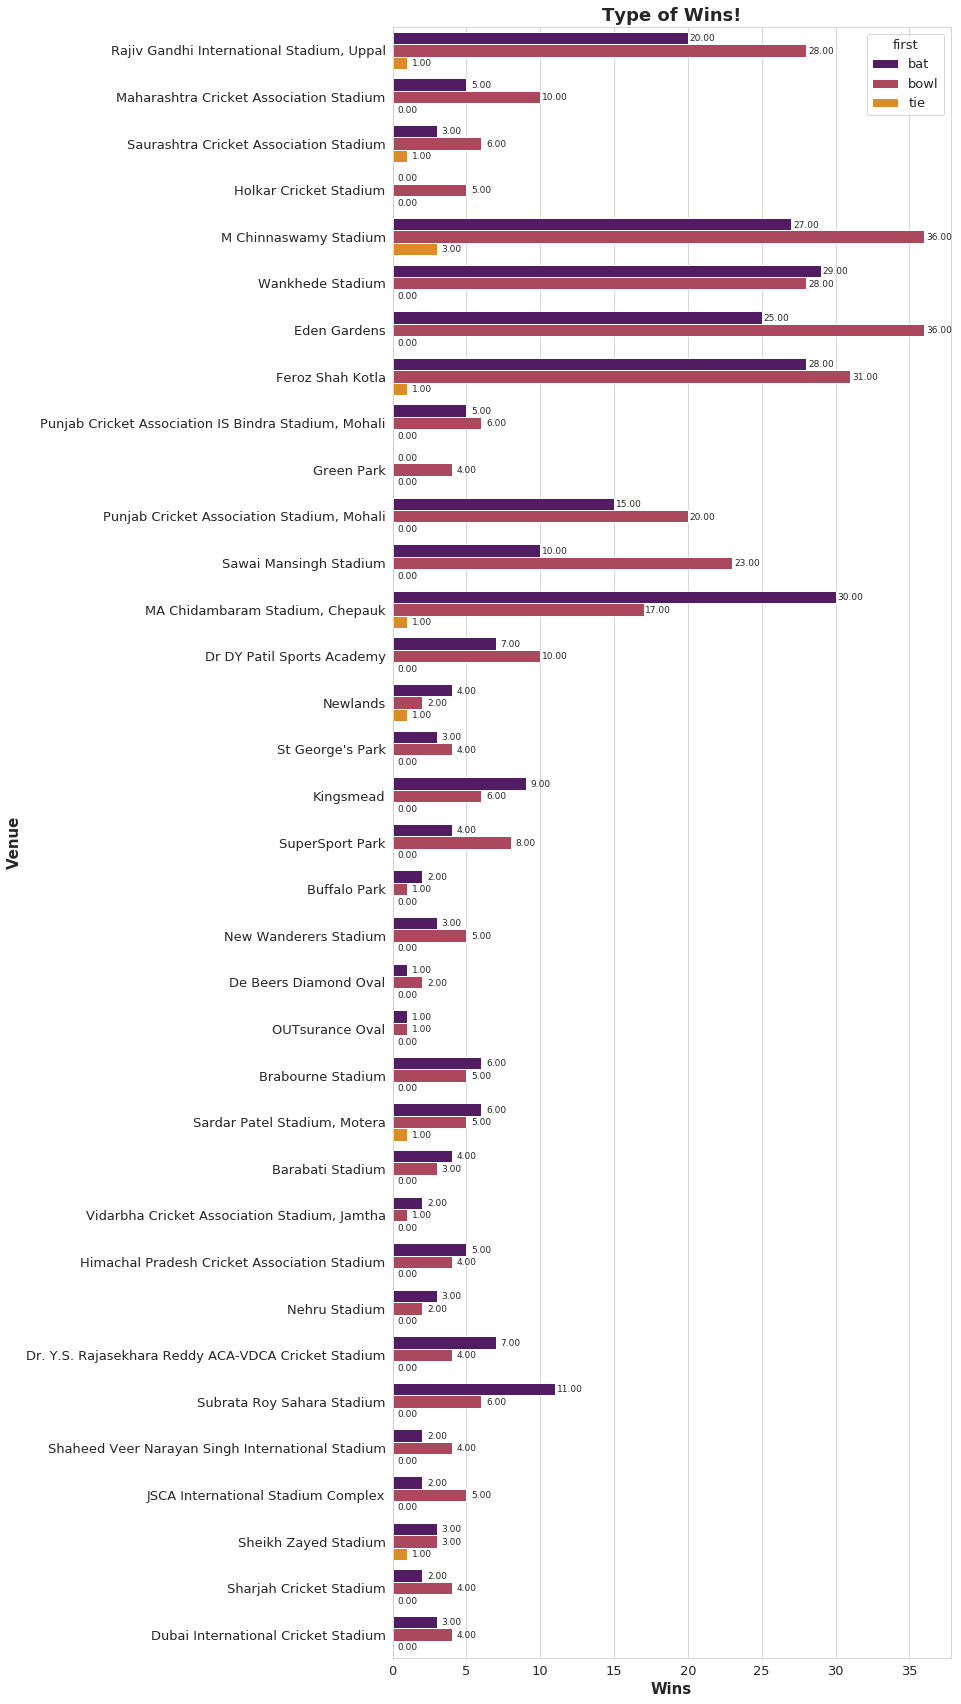

In [154]:
fig, ax = plt.subplots(figsize=(10,30))
ax = sns.countplot(y="venue", data=first_by.toPandas(),hue='first',palette='inferno')
ax.set_xlabel('Wins',fontsize = 15,weight="heavy")
ax.set_ylabel('Venue',fontsize = 15,weight="heavy")
ax.set_title('Type of Wins!', fontsize = 18,weight="heavy")
for p in ax.patches:
    width = p.get_width()
    if(math.isnan(width)):
        width = 0
    plt.text(1+width, p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center',fontsize=9)

## Number of games each Season

In [155]:
from pyspark.sql.functions import countDistinct
matches.agg(countDistinct("season")).show()

+----------------------+
|count(DISTINCT season)|
+----------------------+
|                    10|
+----------------------+



In [156]:
matches.groupby('season').agg(countDistinct("id")).show()

+------+------------------+
|season|count(DISTINCT id)|
+------+------------------+
|  2015|                59|
|  2013|                76|
|  2014|                60|
|  2012|                74|
|  2009|                57|
|  2016|                60|
|  2010|                60|
|  2011|                73|
|  2008|                58|
|  2017|                59|
+------+------------------+



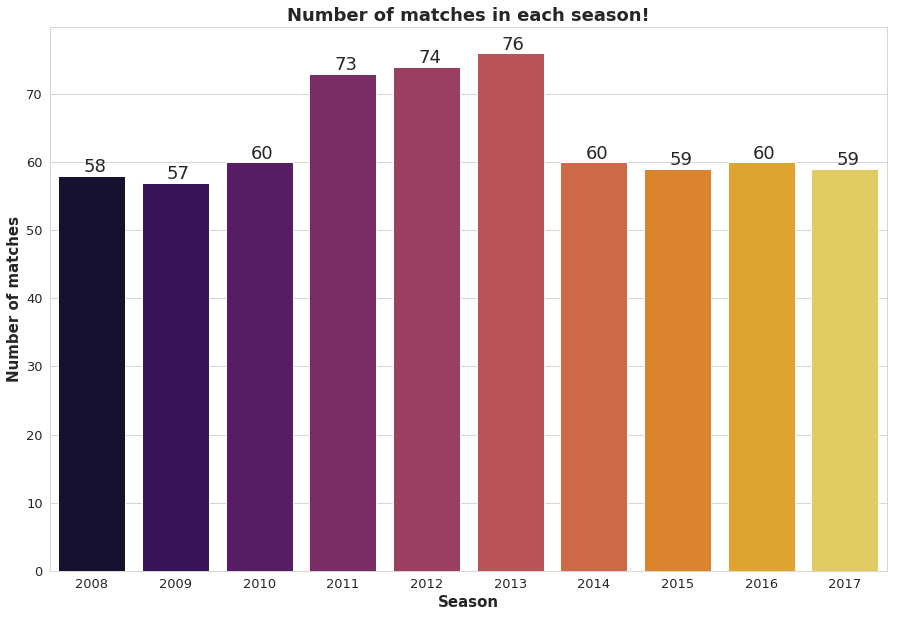

In [157]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.countplot(x="season", data=matches.toPandas(),palette='inferno')
ax.set_xlabel('Season',fontsize = 15,weight = "bold")
ax.set_ylabel('Number of matches',fontsize = 15, fontweight = "heavy")
ax.set_title('Number of matches in each season!', fontsize = 18,weight = "heavy")
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.3, p.get_height()+0.5),fontsize = 18)
plt.show()

## Number of wins by each team

In [158]:
matches.groupby('winner').agg(countDistinct("id").alias('wins')).show()

+------+----+
|winner|wins|
+------+----+
|    DC|  29|
|    GL|  13|
|    RR|  63|
|  null|   3|
|    MI|  92|
|    DD|  62|
|   CSK|  79|
|   KKL|  77|
|   SRH|  42|
|   RCB|  73|
|   RPS|  15|
|   KTK|   6|
|    PW|  12|
|  KXIP|  70|
+------+----+



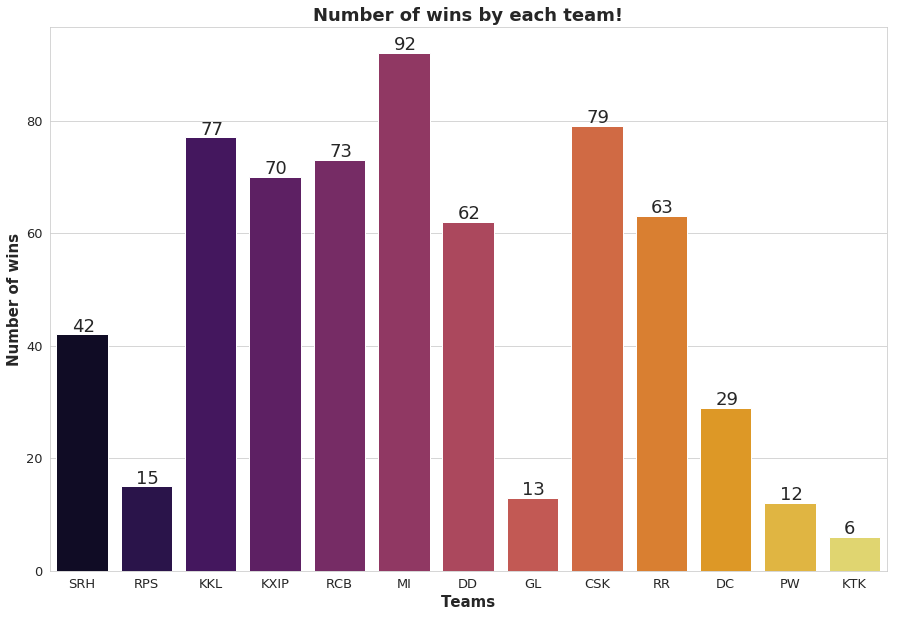

In [159]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.countplot(x="winner", data=matches.toPandas(),palette='inferno')
ax.set_ylabel('Number of wins',fontsize = 15,weight='heavy')
ax.set_xlabel('Teams',fontsize = 15,weight='heavy')
ax.set_title('Number of wins by each team!', fontsize = 18,weight='heavy')
for p in ax.patches:
             ax.annotate(format(p.get_height()), (p.get_x()+0.24, p.get_height()+0.5),fontsize = 18)

## Analysing player of the match winners

In [160]:
matches.groupby('player_of_match').agg(countDistinct("id").alias('count')).sort('count',ascending=False).show()

+---------------+-----+
|player_of_match|count|
+---------------+-----+
|       CH Gayle|   18|
|      YK Pathan|   16|
| AB de Villiers|   15|
|      DA Warner|   15|
|       SK Raina|   14|
|      RG Sharma|   14|
|      G Gambhir|   13|
|       MS Dhoni|   13|
|      AM Rahane|   12|
|     MEK Hussey|   12|
|        V Kohli|   11|
|       V Sehwag|   11|
|       DR Smith|   11|
|      SR Watson|   10|
|      JH Kallis|   10|
|       SE Marsh|    9|
|       A Mishra|    9|
|     KA Pollard|    9|
|   SR Tendulkar|    8|
|     RV Uthappa|    7|
+---------------+-----+
only showing top 20 rows



In [161]:
top_players = matches.groupby('player_of_match').agg(countDistinct("id").alias('count')).sort('count',ascending=False).toPandas()

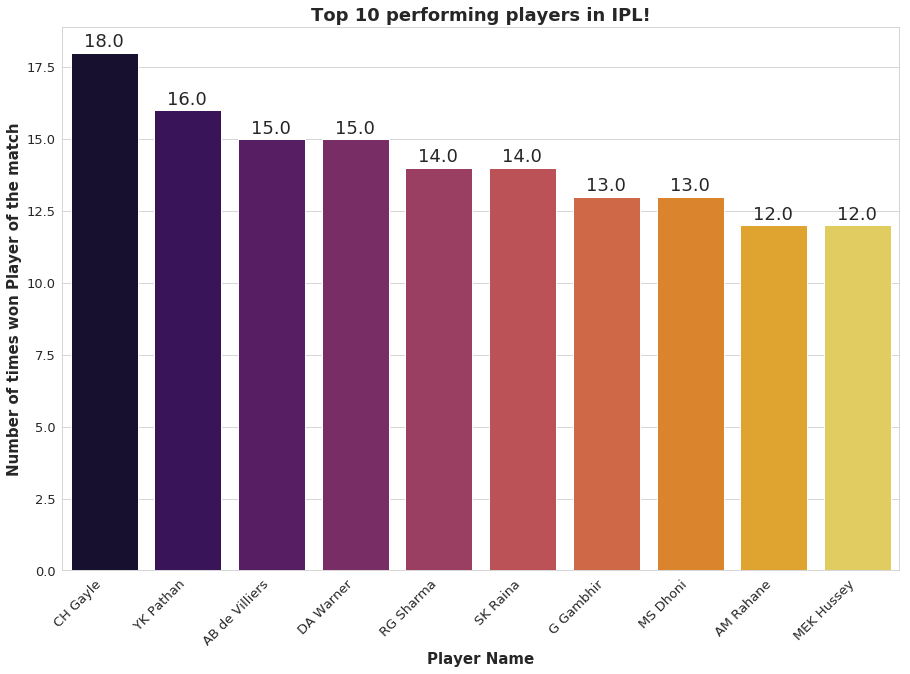

In [162]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(x="player_of_match",y="count", data= top_players.nlargest(10,'count'),palette='inferno')
ax.set_ylabel('Number of times won Player of the match',fontsize = 15,weight = 'heavy')
ax.set_xlabel('Player Name',fontsize = 15,weight = 'heavy')
ax.set_title('Top 10 performing players in IPL!', fontsize = 18,weight = 'heavy')
labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_xticklabels(labels, rotation = 45, ha="right")
for p in ax.patches:
             ax.annotate(format(p.get_height()), (p.get_x()+0.155, p.get_height()+0.2),fontsize = 18)

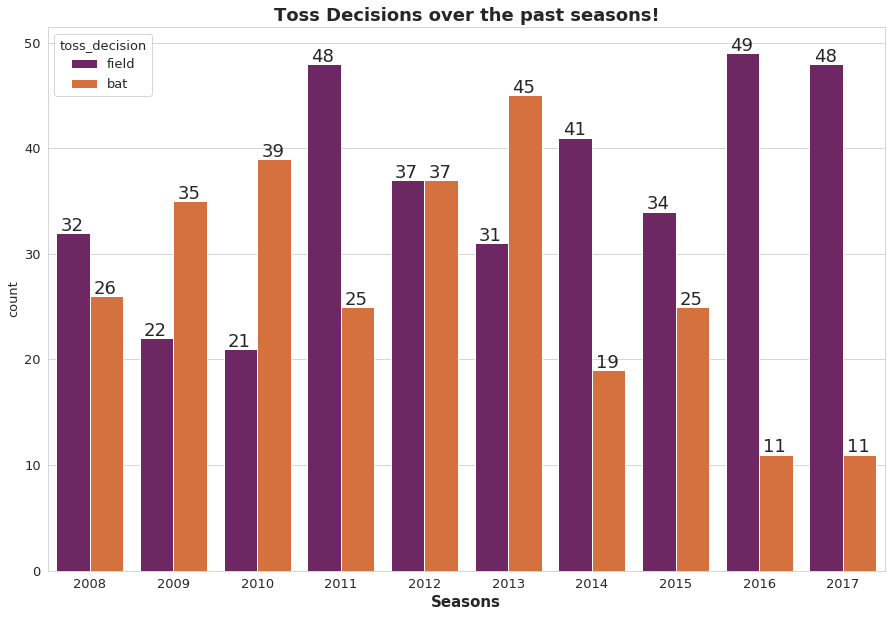

In [163]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.countplot(x="season", data=matches.toPandas(),hue='toss_decision',palette='inferno')
ax.set_xlabel('Seasons',fontsize = 15,weight="heavy")
ax.set_title('Toss Decisions over the past seasons!', fontsize = 18,weight="heavy")
for p in ax.patches:
             ax.annotate(format(p.get_height()), (p.get_x()+0.05, p.get_height()+0.2),fontsize = 18)

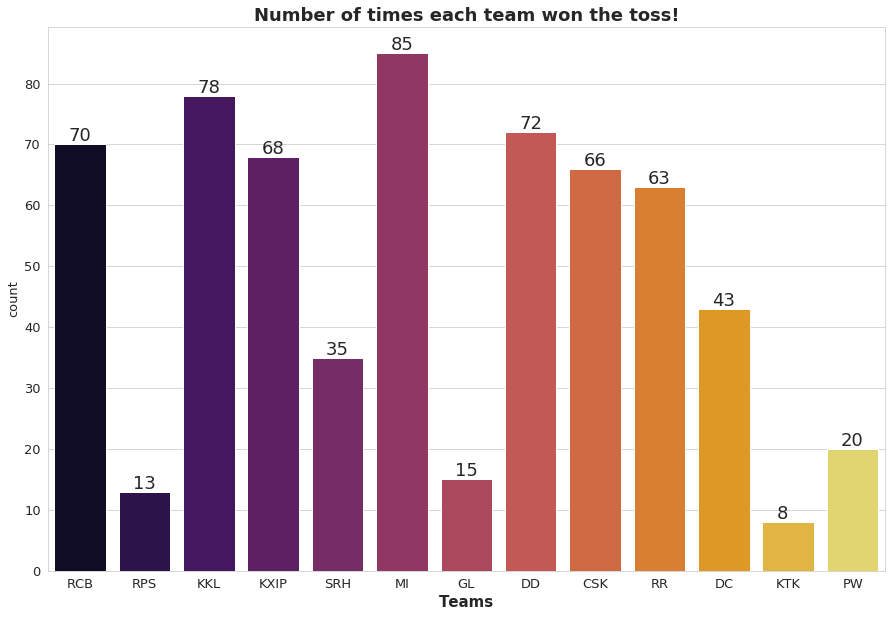

In [164]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.countplot(x="toss_winner", data=matches.toPandas(),palette='inferno')
ax.set_xlabel('Teams',fontsize = 15,weight="heavy")
ax.set_title('Number of times each team won the toss!', fontsize = 18,weight="heavy")
for p in ax.patches:
             ax.annotate(format(p.get_height()), (p.get_x()+0.22, p.get_height()+0.5),fontsize = 18)

## Team which converts toss wins to match wins the most

In [165]:
toss = sqlContext.sql('select *,round((toss_wins/total_matches * 100)) as p_toss_wins from (select t1.toss_winner as team, (t4.matches_played_1 + t5.matches_played_2) as total_matches, \
                    t3.total_wins, \
                    round((t3.total_wins /(t4.matches_played_1 + t5.matches_played_2) * 100)) as p_wins, \
                 t1.toss_wins, t2.toss_wins_wins as wins_when_tw,\
                round((t2.toss_wins_wins / t1.toss_wins * 100)) as p_wins_when_tw, \
                round(((t3.total_wins - t2.toss_wins_wins) / ((t4.matches_played_1 + t5.matches_played_2) \
                - t1.toss_wins) * 100 )) as p_wins_when_tl from \
               (select toss_winner,count(*) as toss_wins from venue group by toss_winner)t1\
               inner join \
               (select winner,count(*) as toss_wins_wins from venue where toss_winner = winner group by winner)t2\
               inner join \
               (select winner,count(*) as total_wins from venue group by winner)t3 \
                inner join \
               (select team1,count(*) as matches_played_1 from venue group by team1)t4 \
                inner join \
               (select team2,count(*) as matches_played_2 from venue group by team2)t5 \
               on t1.toss_winner = t2.winner \
               and t1.toss_winner = t3.winner \
               and t3.winner = t4.team1 \
               and t3.winner = t5.team2)')
toss.show()

+----+-------------+----------+------+---------+------------+--------------+--------------+-----------+
|team|total_matches|total_wins|p_wins|toss_wins|wins_when_tw|p_wins_when_tw|p_wins_when_tl|p_toss_wins|
+----+-------------+----------+------+---------+------------+--------------+--------------+-----------+
|  DC|           75|        29|  39.0|       43|          19|          44.0|          31.0|       57.0|
|  GL|           30|        13|  43.0|       15|          10|          67.0|          20.0|       50.0|
|  RR|          118|        63|  53.0|       63|          34|          54.0|          53.0|       53.0|
|  MI|          157|        92|  59.0|       85|          48|          56.0|          61.0|       54.0|
|  DD|          147|        62|  42.0|       72|          33|          46.0|          39.0|       49.0|
| KKL|          148|        77|  52.0|       78|          44|          56.0|          47.0|       53.0|
| CSK|          131|        79|  60.0|       66|          42|   

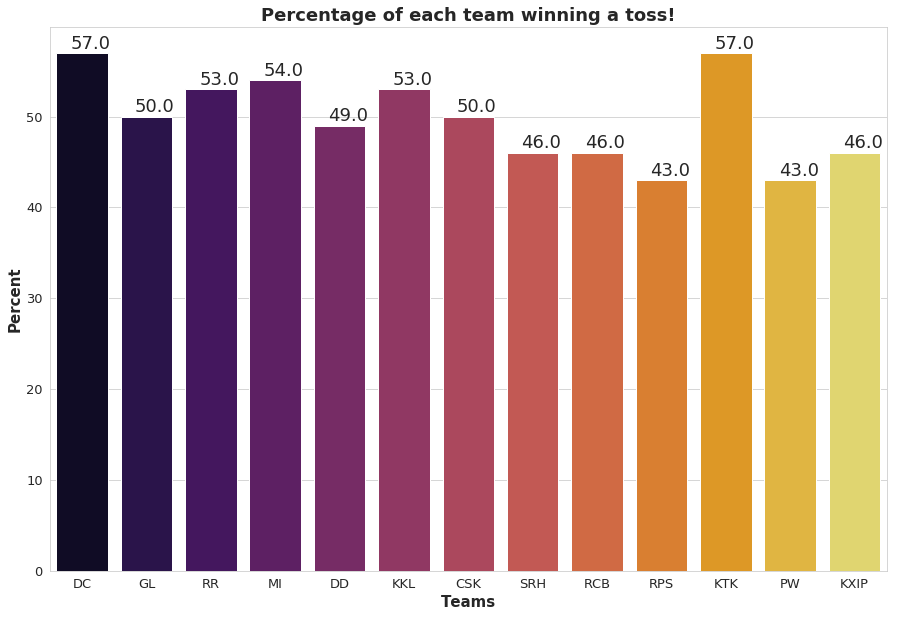

In [166]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(x="team",y = "p_toss_wins", data=toss.toPandas(),palette='inferno')
ax.set_xlabel('Teams',fontsize = 15,weight="heavy")
ax.set_ylabel('Percent',fontsize = 15,weight = 'heavy')
ax.set_title('Percentage of each team winning a toss!', fontsize = 18,weight="heavy")
for p in ax.patches:
             ax.annotate(format(p.get_height()), (p.get_x()+0.22, p.get_height()+0.5),fontsize = 18)

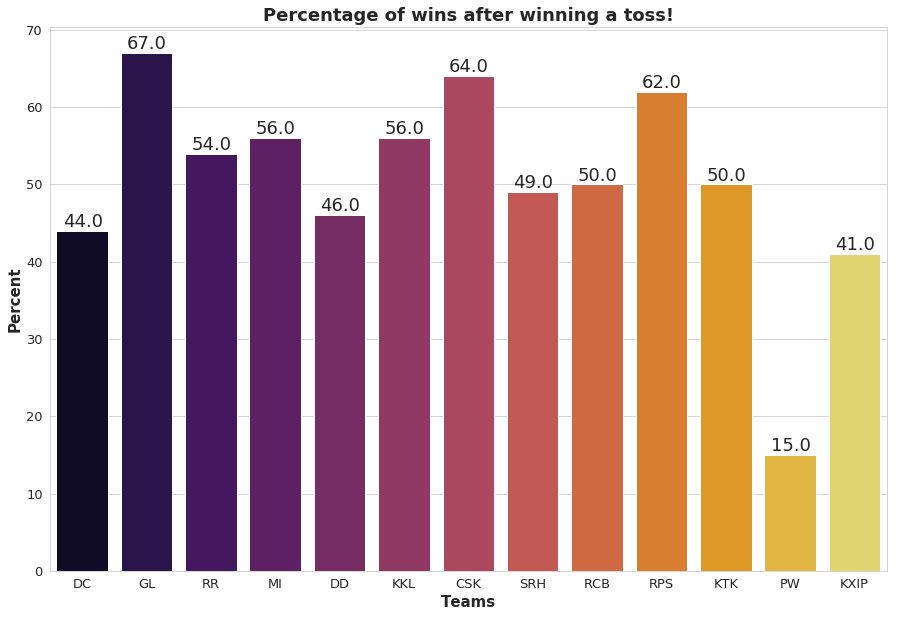

In [167]:
fig, ax = plt.subplots(figsize=(15,10))
y = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75]
ax = sns.barplot(x="team",y="p_wins_when_tw", data= toss.toPandas(),palette='inferno')
ax.set_ylabel('Percent',fontsize = 15,weight = 'heavy')
ax.set_xlabel('Teams',fontsize = 15,weight = 'heavy')
ax.set_title('Percentage of wins after winning a toss!', fontsize = 18,weight = 'heavy')
for p in ax.patches:
             ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.5),fontsize = 18)

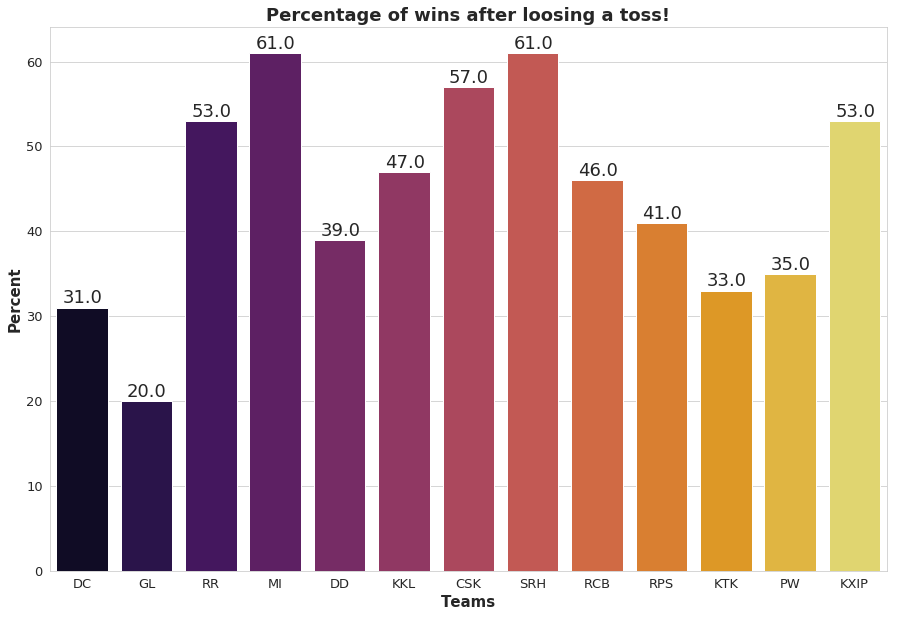

In [168]:
fig, ax = plt.subplots(figsize=(15,10))
y = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75]
ax = sns.barplot(x="team",y="p_wins_when_tl", data= toss.toPandas(),palette='inferno')
ax.set_ylabel('Percent',fontsize = 15,weight = 'heavy')
ax.set_xlabel('Teams',fontsize = 15,weight = 'heavy')
ax.set_title('Percentage of wins after loosing a toss!', fontsize = 18,weight = 'heavy')
for p in ax.patches:
             ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.5),fontsize = 18)

## Is toss winner also a match winner ?

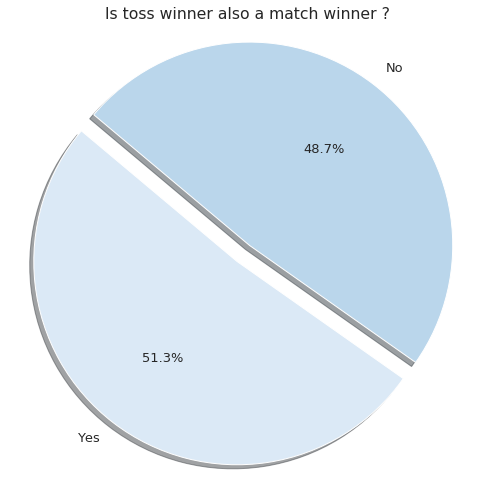

In [169]:
toss_winner_winner = matches.select('*').filter('toss_winner = winner').count()
toss_winner_loser = matches.select('*').filter('toss_winner != winner and winner is not null').count()
labels = 'Yes', 'No'
sizes = [toss_winner_winner,toss_winner_loser]
explode = (0.1, 0)  # explode 1st slice
 
# Plot
fig, ax = plt.subplots(figsize=(7,7))
ax = plt.pie(sizes, explode=explode, labels=labels, colors=sns.color_palette('Blues'),
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title(' Is toss winner also a match winner ?')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Machine Learning

In [170]:
deliveries = spark.read.csv('/home/vivek/543_ipl/deliveries.csv',inferSchema=True,header=True)
matches = spark.read.csv('/home/vivek/543_ipl/matches.csv',inferSchema=True,header=True)
deliveries.show(n=4,truncate=True,vertical=True)

-RECORD 0--------------------------------
 match_id         | 1                    
 inning           | 1                    
 batting_team     | Sunrisers Hyderabad  
 bowling_team     | Royal Challengers... 
 over             | 1                    
 ball             | 1                    
 batsman          | DA Warner            
 non_striker      | S Dhawan             
 bowler           | TS Mills             
 is_super_over    | 0                    
 wide_runs        | 0                    
 bye_runs         | 0                    
 legbye_runs      | 0                    
 noball_runs      | 0                    
 penalty_runs     | 0                    
 batsman_runs     | 0                    
 extra_runs       | 0                    
 total_runs       | 0                    
 player_dismissed | null                 
 dismissal_kind   | null                 
 fielder          | null                 
-RECORD 1--------------------------------
 match_id         | 1             

### Removing Umpire 3 as not needed

In [171]:
matches = matches.drop("umpire3")
deliveries = deliveries.fillna(0)
old_team_names = matches.select("team1").distinct().rdd.flatMap(lambda x:x).collect()
new_team_names = ['SRH','CSK','RPS','DC','KTK','RR','GL','RCB','KKR','RPS','KXIP','PW','DD','MI']
matches = matches.replace(old_team_names,new_team_names)
deliveries = deliveries.replace(old_team_names,new_team_names)

### Merging the 2 databases

In [172]:
matches.registerTempTable('matches_db')
deliveries.registerTempTable('deliveries_db')

combined = sqlContext.sql('select m.*,d.* from matches_db as m inner join deliveries_db as d on m.id=d.match_id')

combined.show(n=3,vertical=True,truncate=True)

-RECORD 0--------------------------------
 id               | 1                    
 season           | 2017                 
 city             | Hyderabad            
 date             | 2017-04-05 00:00:00  
 team1            | SRH                  
 team2            | RCB                  
 toss_winner      | RCB                  
 toss_decision    | field                
 result           | normal               
 dl_applied       | 0                    
 winner           | SRH                  
 win_by_runs      | 35                   
 win_by_wickets   | 0                    
 player_of_match  | Yuvraj Singh         
 venue            | Rajiv Gandhi Inte... 
 umpire1          | AY Dandekar          
 umpire2          | NJ Llong             
 match_id         | 1                    
 inning           | 1                    
 batting_team     | SRH                  
 bowling_team     | RCB                  
 over             | 1                    
 ball             | 1             

In [173]:
combined.registerTempTable('db')

#bowler economy != 0, batsman - balls > 50 

#newdb = sqlContext.sql('delete from db where distinct(count(match_id)) ')

### Calculating fast scoring ability of each batsman

In [174]:
no_of_matches = sqlContext.sql('select batsman, count(distinct(match_id)) \
                                    as no_of_matches from db group by batsman')
no_of_matches.registerTempTable('no_of_matches_table')
fast_scoring_ability = sqlContext.sql('select batsman, Total_Runs/balls_played as fast_scoring_ability \
from (select batsman,sum(batsman_runs) as Total_Runs, count(*) as balls_played from db group by batsman)')
fast_scoring_ability.show(50)

+---------------+--------------------+
|        batsman|fast_scoring_ability|
+---------------+--------------------+
|  Kuldeep Yadav|  0.9090909090909091|
|     S Anirudha|  1.1239669421487604|
|     TM Dilshan|  1.1012416427889207|
|     KA Pollard|  1.4062126642771804|
| M Muralitharan|  0.6666666666666666|
|  LA Carseldine|  1.1408450704225352|
|        J Botha|  1.1236263736263736|
|      CA Ingram|  0.8076923076923077|
|       DR Smith|  1.3227953410981697|
| Jaskaran Singh|  0.7272727272727273|
|     A Flintoff|   1.087719298245614|
|       M Manhas|  1.0576131687242798|
|      GR Napier|              0.9375|
|       AR Patel|  1.2267206477732793|
|       SA Yadav|   1.269311064718163|
|          B Lee|  1.2156862745098038|
|       A Mukund|  0.8260869565217391|
|     D du Preez|  0.7692307692307693|
|    BMAJ Mendis|  0.8518518518518519|
|NM Coulter-Nile|  0.9811320754716981|
|Mohammad Hafeez|  0.7619047619047619|
|      LPC Silva|  1.4814814814814814|
|     AL Menaria|  1.0926

In [175]:
fast_scoring_ability.registerTempTable('fast_scoring_ability_table')
fast_scoring_ability_new = sqlContext.sql('select t1.*, rank() over (order by fast_scoring_ability desc) as rank \
                                          from fast_scoring_ability_table t1 inner join no_of_matches_table t2 \
                                          on t1.batsman = t2.batsman where no_of_matches>9')
fast_scoring_ability_new.registerTempTable('fast_scoring_ability_new')
c = sqlContext.sql('select count(*) from fast_scoring_ability_new')
fast_scoring_ability_new.show()

+--------------+--------------------+----+
|       batsman|fast_scoring_ability|rank|
+--------------+--------------------+----+
|       SN Khan|  1.7184466019417475|   1|
|     KK Cooper|  1.6571428571428573|   2|
|    AD Russell|                1.64|   3|
|     CH Morris|  1.5963636363636364|   4|
|    GJ Maxwell|  1.5756410256410256|   5|
|     KH Pandya|  1.5335463258785942|   6|
|  Bipul Sharma|  1.5080645161290323|   7|
|      V Sehwag|  1.4882705946535735|   8|
|       RR Pant|  1.4803149606299213|   9|
|       CA Lynn|   1.476923076923077|  10|
|AB de Villiers|  1.4512905911740217|  11|
|      CH Gayle|  1.4419431279620853|  12|
|A Ashish Reddy|  1.4285714285714286|  13|
|   MF Maharoof|  1.4274193548387097|  14|
|   RA Tripathi|  1.4218181818181819|  15|
|    JC Buttler|               1.408|  16|
|     YK Pathan|   1.407514450867052|  17|
|    KA Pollard|  1.4062126642771804|  18|
|     SP Narine|  1.4041450777202074|  19|
|       MJ Lumb|   1.404040404040404|  20|
+----------

### Calculating weight of fast scoring ability

In [176]:
fast_scoring_ability_final = sqlContext.sql('select t1.*, (212-rank)/212 as points from \
fast_scoring_ability_new t1')

fast_scoring_ability_final.registerTempTable('fast_scoring_ability_final')

fast_scoring_ability_weights = sqlContext.sql('select t1.*, points*1.25 as weight from fast_scoring_ability_final t1')

fast_scoring_ability_weights.show()

fast_scoring_ability_weights.registerTempTable('fast_scoring_ability_weights')

+--------------+--------------------+----+------------------+------------------+
|       batsman|fast_scoring_ability|rank|            points|            weight|
+--------------+--------------------+----+------------------+------------------+
|       SN Khan|  1.7184466019417475|   1|0.9952830188679245|1.2441037735849056|
|     KK Cooper|  1.6571428571428573|   2|0.9905660377358491|1.2382075471698113|
|    AD Russell|                1.64|   3|0.9858490566037735| 1.232311320754717|
|     CH Morris|  1.5963636363636364|   4|0.9811320754716981|1.2264150943396226|
|    GJ Maxwell|  1.5756410256410256|   5|0.9764150943396226|1.2205188679245282|
|     KH Pandya|  1.5335463258785942|   6|0.9716981132075472|1.2146226415094339|
|  Bipul Sharma|  1.5080645161290323|   7|0.9669811320754716|1.2087264150943395|
|      V Sehwag|  1.4882705946535735|   8|0.9622641509433962|1.2028301886792452|
|       RR Pant|  1.4803149606299213|   9|0.9575471698113207|1.1969339622641508|
|       CA Lynn|   1.4769230

### Calculating consistency and its weight for each batsman

In [177]:
consistency = sqlContext.sql('select t1.batsman,t1.Total_runs/t2.no_of_times_dismissed as consistency \
                             from (select batsman,sum(batsman_runs) as Total_runs \
                             from db group by batsman) t1 \
                             inner join (select batsman, count(*) as no_of_times_dismissed \
                             from db where player_dismissed is not null \
                             group by batsman) t2 on t1.batsman=t2.batsman')

consistency.registerTempTable('consistency_table')

c = sqlContext.sql('select count(*) from consistency_table')

c.show()

consistency_new = sqlContext.sql('select t1.*, rank() over (order by consistency desc) as rank from \
                                  consistency_table t1 inner join no_of_matches_table t2\
                                  on t1.batsman = t2.batsman where no_of_matches > 9')

consistency_new.show()

consistency_new.registerTempTable('consistency_new')

consistency_final = sqlContext.sql('select t1.*, (212-rank)/212 as points from consistency_new t1')

consistency_final.registerTempTable('consistency_final')

c = sqlContext.sql('select count(*) from consistency_final')

c.show()

consistency_weights = sqlContext.sql('select t1.*, points as weight from consistency_final t1')

consistency_weights.registerTempTable('consistency_weights')

consistency_weights.show()

+--------+
|count(1)|
+--------+
|     431|
+--------+

+--------------+------------------+----+
|       batsman|       consistency|rank|
+--------------+------------------+----+
| Iqbal Abdulla|              88.0|   1|
|       HM Amla| 44.38461538461539|   2|
|     JP Duminy|41.520833333333336|   3|
|AB de Villiers| 41.01176470588236|   4|
|      CH Gayle| 40.56666666666667|   5|
|     KH Pandya|              40.0|   6|
|   LMP Simmons| 39.96296296296296|   7|
|     ML Hayden|39.535714285714285|   8|
|     DA Warner| 39.35294117647059|   9|
|       OA Shah| 38.92307692307692|  10|
|       CA Lynn|              38.4|  11|
|      SE Marsh|38.292307692307695|  12|
|    MEK Hussey| 38.01923076923077|  13|
|     A Symonds| 37.46153846153846|  14|
|       V Kohli|  35.1031746031746|  15|
|     DA Miller|34.733333333333334|  16|
|  KP Pietersen| 34.51724137931034|  17|
|     SPD Smith|             34.26|  18|
| KS Williamson|             34.25|  19|
|      SK Raina| 34.19548872180451|  20|
+

### ### Calculating hard hitting ability and its weight for each batsman

In [178]:
hard_hitting_ability = sqlContext.sql('select t5.batsman, nvl(t4.hard_hitting_ability,0) as \
                hard_hitting_ability from \
               (select t1.batsman, (t1.fours*4 + t2.sixes*6)/t3.balls_played as hard_hitting_ability\
               from (select batsman,count(*) as fours from db where batsman_runs = 4 group by batsman) t1 \
               inner join  \
               (select batsman,count(*) as sixes from db where batsman_runs = 6 \
               group by batsman) t2 on t1.batsman=t2.batsman\
               inner join\
               (select batsman,count(*) as balls_played from db \
               group by batsman) t3 on t3.batsman=t1.batsman) t4 \
               right join no_of_matches_table t5 on t4.batsman = t5.batsman')

hard_hitting_ability.registerTempTable('hard_hitting_ability_table')

c = sqlContext.sql('select count(*) from hard_hitting_ability_table')

c.show()

hard_hitting_ability_new = sqlContext.sql('select t1.*, rank() over (order by hard_hitting_ability desc) as rank \
                                          from hard_hitting_ability_table t1 inner join no_of_matches_table t2\
                                          on t1.batsman = t2.batsman where no_of_matches>9')

hard_hitting_ability_new.registerTempTable('hard_hitting_ability_new')

c = sqlContext.sql('select count(*) from hard_hitting_ability_new')

hard_hitting_ability_final = sqlContext.sql('select t1.*, (212-rank)/212 as points from hard_hitting_ability_new t1')

hard_hitting_ability_final.registerTempTable('hard_hitting_ability_final')

hard_hitting_ability_weights = sqlContext.sql('select t1.*, points*1.25 as weight from hard_hitting_ability_final t1')

hard_hitting_ability_weights.registerTempTable('hard_hitting_ability_weights')

hard_hitting_ability_weights.show()

+--------+
|count(1)|
+--------+
|     461|
+--------+

+---------------+--------------------+----+------------------+------------------+
|        batsman|hard_hitting_ability|rank|            points|            weight|
+---------------+--------------------+----+------------------+------------------+
|      KK Cooper|                 1.2|   1|0.9952830188679245|1.2441037735849056|
|     AD Russell|  1.1828571428571428|   2|0.9905660377358491|1.2382075471698113|
|     GJ Maxwell|   1.123076923076923|   3|0.9858490566037735| 1.232311320754717|
|      SP Narine|  1.1191709844559585|   4|0.9811320754716981|1.2264150943396226|
|       CH Gayle|   1.099526066350711|   5|0.9764150943396226|1.2205188679245282|
|        MJ Lumb|  1.0909090909090908|   6|0.9716981132075472|1.2146226415094339|
|        SN Khan|   1.087378640776699|   7|0.9669811320754716|1.2087264150943395|
|       V Sehwag|  1.0758319694489906|   8|0.9622641509433962|1.2028301886792452|
|        CA Lynn|  1.0076923076923077|   9

### Calculating running between the wickets and its weight for each batsman

In [179]:
running_between_wickets = sqlContext.sql('select t9.batsman, nvl(t8.running_between_wickets,0) as running_between_wickets from\
               (select t4.batsman, t4.first_bracket/t7.second_bracket as running_between_wickets from\
               (select t1.batsman, t3.total_runs-(t1.fours*4 + t2.sixes*6) as first_bracket from (select batsman,count(*) as fours from db where batsman_runs = 4 \
               group by batsman) t1 \
               inner join  \
               (select batsman,count(*) as sixes from db where batsman_runs = 6 \
               group by batsman) t2 on t1.batsman=t2.batsman\
               inner join\
               (select batsman,sum(batsman_runs) as total_runs from db \
               group by batsman) t3 on t3.batsman=t1.batsman) t4 \
               inner join\
               (select t5.batsman, t5.total_balls_played-t6.boundry_balls as second_bracket from\
                 (select batsman, count(*) as total_balls_played from db group by batsman) t5\
                 inner join \
                 (select batsman, count(*) as boundry_balls from db where batsman_runs=4 or batsman_runs=6 group by batsman) t6\
                 on t5.batsman=t6.batsman) t7\
                 on t4.batsman=t7.batsman) t8\
                 right join no_of_matches_table t9\
                 on t8.batsman = t9.batsman')

running_between_wickets.registerTempTable('running_between_wickets_table')

running_between_wickets_new = sqlContext.sql('select t1.*, rank() over (order by running_between_wickets desc) as rank \
                                          from running_between_wickets_table t1 inner join no_of_matches_table t2\
                                          on t1.batsman = t2.batsman where no_of_matches>9')

running_between_wickets_new.registerTempTable('running_between_wickets_new')

c = sqlContext.sql('select count(*) from running_between_wickets_new')

running_between_wickets_final = sqlContext.sql('select t1.*, (212-rank)/212 as points from running_between_wickets_new t1')

running_between_wickets_final.registerTempTable('running_between_wickets_final')

running_between_wickets_weights = sqlContext.sql('select t1.*, points as weight from running_between_wickets_final t1')

running_between_wickets_weights.registerTempTable('running_between_wickets_weights')

running_between_wickets_weights.show()

+--------------+-----------------------+----+------------------+------------------+
|       batsman|running_between_wickets|rank|            points|            weight|
+--------------+-----------------------+----+------------------+------------------+
|  Bipul Sharma|     0.8557692307692307|   1|0.9952830188679245|0.9952830188679245|
|       SN Khan|     0.8333333333333334|   2|0.9905660377358491|0.9905660377358491|
|       TM Head|     0.8320610687022901|   3|0.9858490566037735|0.9858490566037735|
|    WPUJC Vaas|     0.8088235294117647|   4|0.9811320754716981|0.9811320754716981|
|      M Kartik|     0.7821782178217822|   5|0.9764150943396226|0.9764150943396226|
|     CH Morris|      0.771689497716895|   6|0.9716981132075472|0.9716981132075472|
|A Ashish Reddy|     0.7636363636363637|   7|0.9669811320754716|0.9669811320754716|
|     SPD Smith|     0.7379067722075637|   8|0.9622641509433962|0.9622641509433962|
| KS Williamson|     0.7347670250896058|   9|0.9575471698113207|0.9575471698

### Calculating finisher and its weight for each batsman

In [180]:
finisher = sqlContext.sql('select t3.batsman, t3.not_out_innings/t4.total_matches_played as finisher from\
                          (select t1.batsman, t1.matches_played-t2.number_of_times_out as not_out_innings from \
                          (select batsman, count(distinct(match_id)) as matches_played from db group by batsman) t1\
                          inner join \
                          (select batsman, count(*) as number_of_times_out from db where player_dismissed = batsman group by batsman) t2\
                          on t1.batsman=t2.batsman) t3\
                          inner join\
                          (select batsman, count(distinct(match_id)) as total_matches_played from db group by batsman) t4\
                          on t3.batsman = t4.batsman')

finisher.registerTempTable('finisher_table')

finisher_new = sqlContext.sql('select t1.*, rank() over (order by finisher desc) as rank \
                                          from finisher_table t1 inner join no_of_matches_table t2\
                                          on t1.batsman = t2.batsman where no_of_matches>9')

finisher_new.registerTempTable('finisher_new')

c = sqlContext.sql('select count(*) from finisher_new')

finisher_final = sqlContext.sql('select t1.*, (212-rank)/212 as points from finisher_new t1')

finisher_final.registerTempTable('finisher_final')

finisher_weights = sqlContext.sql('select *, points*1.25 as weight from finisher_final')

finisher_weights.show()

finisher_weights.registerTempTable('finisher_weights')

+--------------+------------------+----+------------------+------------------+
|       batsman|          finisher|rank|            points|            weight|
+--------------+------------------+----+------------------+------------------+
| Iqbal Abdulla|0.9230769230769231|   1|0.9952830188679245|1.2441037735849056|
|Sandeep Sharma|0.9090909090909091|   2|0.9905660377358491|1.2382075471698113|
|      A Kumble|0.8666666666666667|   3|0.9858490566037735| 1.232311320754717|
|   S Sreesanth|              0.75|   4|0.9811320754716981|1.2264150943396226|
|     S Aravind|               0.7|   5|0.9764150943396226|1.2205188679245282|
|      UT Yadav|0.6956521739130435|   6|0.9716981132075472|1.2146226415094339|
|  Bipul Sharma|0.6470588235294118|   7|0.9669811320754716|1.2087264150943395|
|      I Sharma|0.6470588235294118|   7|0.9669811320754716|1.2087264150943395|
|       A Nehra|0.6470588235294118|   7|0.9669811320754716|1.2087264150943395|
|    PJ Sangwan|0.5833333333333334|  10|0.9528301886

### Calculating total batting weight and its weight for each batsman

In [181]:
total_batting_weight = sqlContext.sql('select t9.batsman, \
t9.fast_scoring_weight+t9.consistency_weight+t9.hard_hitting_weight+\
t9.running_between_wickets_weight+t9.finisher_weight as total_batting_weight from\
               (select t7.batsman as batsman, t7.fast_scoring_weight as fast_scoring_weight, \
               t7.consistency_weight as consistency_weight, t7.hard_hitting_weight as hard_hitting_weight,\
               t7.running_between_wickets_weight as running_between_wickets_weight,\
               t8.finisher_weight as finisher_weight from \
               (select t3.batsman as batsman, t3.fast_scoring_weight as fast_scoring_weight,\
               t3.consistency_weight as consistency_weight, t6.hard_hitting_weight as hard_hitting_weight,\
               t6.running_between_wickets_weight as running_between_wickets_weight from \
               (select t1.batsman as batsman, t1.weight as fast_scoring_weight,\
               t2.weight as consistency_weight from  \
               (select batsman, weight from fast_scoring_ability_weights) t1 \
               inner join \
               (select batsman, weight from consistency_weights) t2 \
               on t1.batsman = t2.batsman) t3 \
               inner join \
               (select t4.batsman, t4.weight as hard_hitting_weight, t5.weight as running_between_wickets_weight\
               from  \
               (select batsman, weight from hard_hitting_ability_weights) t4 \
               inner join \
               (select batsman, weight from running_between_wickets_weights) t5 \
               on t4.batsman = t5.batsman) t6 \
               on t3.batsman = t6.batsman) t7 \
               inner join \
               (select batsman, weight as finisher_weight from finisher_weights) t8 \
               on t7.batsman = t8.batsman ) t9 order by total_batting_weight desc')

total_batting_weight.registerTempTable('total_batting_weight')

total_batting_weight.show()

+--------------+--------------------+
|       batsman|total_batting_weight|
+--------------+--------------------+
|     CH Morris|    5.44811320754717|
|  Bipul Sharma|   5.226415094339623|
|     KH Pandya|   5.136792452830188|
|       SN Khan|   5.034198113207547|
|AB de Villiers|   4.837264150943396|
|     DA Miller|   4.601415094339623|
|      MS Dhoni|   4.535377358490566|
|     JA Morkel|   4.509433962264151|
|     YK Pathan|   4.449292452830189|
|       TM Head|   4.439858490566038|
|       OA Shah|   4.350235849056603|
|    AD Russell|    4.30188679245283|
|A Ashish Reddy|    4.28066037735849|
|       HM Amla|  4.2299528301886795|
|    KA Pollard|    4.22877358490566|
|     KM Jadhav|    4.19811320754717|
|      SK Raina|   4.193396226415095|
|       CA Lynn|   4.181603773584905|
|   MF Maharoof|   4.178066037735849|
|  KP Pietersen|   4.153301886792453|
+--------------+--------------------+
only showing top 20 rows



In [182]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['font.size'] = 13

In [183]:
no_of_bowlers = sqlContext.sql('Select count(distinct(bowler)) from db ')
no_of_bowlers.show()

+----------------------+
|count(DISTINCT bowler)|
+----------------------+
|                   356|
+----------------------+



In [184]:
no_of_matches = sqlContext.sql('select bowler,count(distinct(match_id)) as no_of_matches from db group by bowler')

no_of_matches.show() 

+---------------+-------------+
|         bowler|no_of_matches|
+---------------+-------------+
|     TM Dilshan|           25|
|  Kuldeep Yadav|           14|
|     KA Pollard|           81|
|        J Botha|           34|
| M Muralitharan|           66|
|  LA Carseldine|            1|
|       DR Smith|           46|
| Jaskaran Singh|            7|
|     A Flintoff|            3|
|       M Manhas|            3|
|      GR Napier|            1|
|       AR Patel|           59|
|       SA Yadav|            1|
|          B Lee|           38|
|    BMAJ Mendis|            2|
|     D du Preez|            2|
|NM Coulter-Nile|           25|
|       HV Patel|           34|
|     AL Menaria|           12|
|Mohammad Hafeez|            4|
+---------------+-------------+
only showing top 20 rows



In [185]:
no_of_matches.registerTempTable('no_of_matches')

### Calculating Economy and its weight for each bowler

In [225]:
economy = sqlContext.sql('Select bowler, runs/overs as economy from (Select bowler,round(count(*)/6) \
                            as overs,sum(total_runs) as runs from db group by bowler)')
economy.registerTempTable('economy')

economy = sqlContext.sql('select e.*,n.no_of_matches, row_number() over (order by e.economy asc) as rank \
                    from economy e inner join no_of_matches n on e.bowler = n.bowler where n.no_of_matches > 9')
economy.registerTempTable('economy')

cnt = sqlContext.sql('select count(*) as cnt from economy')

cnt.show()

economy = sqlContext.sql('select *,points*1.5 as weight from (select *,(191 - rank)/191 as points from economy)')
economy.registerTempTable('economy')

economy.show()

+---+
|cnt|
+---+
|191|
+---+

+-----------------+------------------+-------------+----+------------------+------------------+
|           bowler|           economy|no_of_matches|rank|            points|            weight|
+-----------------+------------------+-------------+----+------------------+------------------+
|    Sohail Tanvir|              6.25|           11|   1|0.9947643979057592| 1.492146596858639|
|       A Chandila| 6.282051282051282|           12|   2|0.9895287958115183|1.4842931937172774|
|Washington Sundar|               6.3|           10|   3|0.9842931937172775|1.4764397905759163|
|          J Yadav| 6.354838709677419|           10|   4|0.9790575916230366|1.4685863874345548|
|        SP Narine| 6.395705521472393|           81|   5|0.9738219895287958|1.4607329842931938|
|         R Ashwin| 6.493638676844784|          108|   6|0.9685863874345549|1.4528795811518325|
|       SM Pollock| 6.531914893617022|           13|   7|0.9633507853403142|1.4450261780104712|
|        

### Calculating Wicket taking Ability and its weight for each bowler

In [187]:
wicket_taking_ability = sqlContext.sql('(Select t1.bowler, t2.balls/t1.wickets as wta  from \
                        (Select bowler,count(*) as wickets from db where player_dismissed is not null \
                         and (dismissal_kind = \'bowled\' or  dismissal_kind = \'hit wicket\' \
                         or  dismissal_kind = \'stumped\' or  dismissal_kind = \'lbw\' \
                         or  dismissal_kind = \'caught and bowled\' or  dismissal_kind = \'caught\') \
                         group by bowler)\
                         t1 inner join (select count(*) as balls,bowler from db group by bowler)t2 on \
                         t1.bowler = t2.bowler)')
wicket_taking_ability.registerTempTable('wicket_taking_ability')

wicket_taking_ability = sqlContext.sql('select w.*,n.no_of_matches, row_number() over (order by wta asc) as rank \
                                        from wicket_taking_ability w inner join no_of_matches n on \
                                        w.bowler = n.bowler where no_of_matches > 9')
wicket_taking_ability.registerTempTable('wicket_taking_ability')

cnt = sqlContext.sql('select count(*) from wicket_taking_ability') 
cnt.show()

wicket_taking_ability = sqlContext.sql('select *,points*1.5 as weight \
                                    from (select *,(191-rank)/191 as points from wicket_taking_ability)')
wicket_taking_ability.registerTempTable('wicket_taking_ability')
wicket_taking_ability.show()

+--------+
|count(1)|
+--------+
|     191|
+--------+

+---------------+------------------+-------------+----+------------------+------------------+
|         bowler|               wta|no_of_matches|rank|            points|            weight|
+---------------+------------------+-------------+----+------------------+------------------+
|        A Zampa|11.842105263157896|           11|   1|0.9947643979057592| 1.492146596858639|
|  Sohail Tanvir|12.045454545454545|           11|   2|0.9895287958115183|1.4842931937172774|
|       BJ Hodge|              14.0|           20|   3|0.9842931937172775|1.4764397905759163|
|   CRD Fernando|14.647058823529411|           10|   4|0.9790575916230366|1.4685863874345548|
|     YA Abdulla|              14.8|           11|   5|0.9738219895287958|1.4607329842931938|
| A Ashish Reddy|              15.0|           20|   6|0.9685863874345549|1.4528795811518325|
|    Imran Tahir|15.617021276595745|           32|   7|0.9633507853403142|1.4450261780104712|
|   

### Calculating Consistency and its weight for each bowler

In [188]:
consistency = sqlContext.sql('select t1.bowler, t1.runs/t2.wickets as consistency \
                        from (select sum(total_runs) as runs,bowler from db group by bowler)t1 \
                        inner join (Select bowler,count(*) as wickets from db where player_dismissed is not null \
                         and (dismissal_kind = \'bowled\' or  dismissal_kind = \'hit wicket\' \
                         or  dismissal_kind = \'stumped\' or  dismissal_kind = \'lbw\' \
                         or  dismissal_kind = \'caught and bowled\' or  dismissal_kind = \'caught\') \
                         group by bowler)t2 on t1.bowler = t2.bowler')
consistency.registerTempTable('consistency')

consistency.show()

consistency = sqlContext.sql('select w.*,n.no_of_matches, row_number() over (order by consistency asc) as rank \
                                        from consistency w inner join no_of_matches n on \
                                        w.bowler = n.bowler where no_of_matches > 9')
consistency.registerTempTable('consistency')

cnt = sqlContext.sql('select count(*) from consistency') 
cnt.show()

consistency = sqlContext.sql('select *,points as weight from (select *,(191-rank)/191 as points from consistency)')
consistency.registerTempTable('consistency')
consistency.show()

+---------------+------------------+
|         bowler|       consistency|
+---------------+------------------+
|  Kuldeep Yadav|24.833333333333332|
|     TM Dilshan|              73.6|
|        J Botha|             32.72|
|     KA Pollard|            31.875|
|  LA Carseldine|               6.0|
| M Muralitharan|         27.578125|
|       DR Smith| 31.73076923076923|
| Jaskaran Singh|              29.0|
|     A Flintoff|              53.0|
|      GR Napier|              28.0|
|       AR Patel|27.310344827586206|
|          B Lee|             45.04|
|    BMAJ Mendis|              36.0|
|     D du Preez|              14.0|
|NM Coulter-Nile| 20.52777777777778|
|     AL Menaria|              48.0|
|       HV Patel| 29.38235294117647|
|Mohammad Hafeez|              35.5|
|Joginder Sharma|35.083333333333336|
|      YK Pathan| 34.65853658536585|
+---------------+------------------+
only showing top 20 rows

+--------+
|count(1)|
+--------+
|     191|
+--------+

+---------------+-------------

### Calculating Crucial Bowler and its weight for each bowler

In [228]:
crucial_bowler = sqlContext.sql(' select t2.bowler, nvl(t1.no_of_4wickets/t2.innings,0) as crucial \
                        from (select bowler,count(*) as no_of_4wickets from (select * from \
                        (select match_id,bowler,count(*) as wickets from db where player_dismissed \
                        is not null \
                        and (dismissal_kind = \'bowled\' or  dismissal_kind = \'hit wicket\' \
                         or  dismissal_kind = \'stumped\' or  dismissal_kind = \'lbw\' \
                         or  dismissal_kind = \'caught and bowled\' or  dismissal_kind = \'caught\') \
                         group by bowler,match_id ) \
                        where wickets > 3) group by bowler)t1 right join (select bowler,count(match_id) as \
                        innings from (select distinct(match_id),bowler from db) group by bowler)t2 \
                        on t1.bowler = t2.bowler order by crucial desc')

crucial_bowler.registerTempTable('crucial_bowler')

crucial_bowler = sqlContext.sql('select w.*,n.no_of_matches, rank() over (order by crucial desc) as rank \
                                        from crucial_bowler w inner join no_of_matches n on \
                                        w.bowler = n.bowler where no_of_matches > 9')

crucial_bowler.registerTempTable('crucial_bowler')

crucial_bowler.count()

crucial_bowler.registerTempTable('crucial_bowler')

cnt = sqlContext.sql('select count(*) from crucial_bowler') 
cnt.show()

crucial_bowler = sqlContext.sql('select *, points *1.5 as weight from \
                    (select *,(191-rank)/191 as points from crucial_bowler)')
crucial_bowler.registerTempTable('crucial_bowler')
crucial_bowler.show()

+--------+
|count(1)|
+--------+
|     191|
+--------+

+--------------+--------------------+-------------+----+------------------+------------------+
|        bowler|             crucial|no_of_matches|rank|            points|            weight|
+--------------+--------------------+-------------+----+------------------+------------------+
| Sohail Tanvir| 0.18181818181818182|           11|   1|0.9947643979057592| 1.492146596858639|
|    YA Abdulla| 0.18181818181818182|           11|   1|0.9947643979057592| 1.492146596858639|
|      J Theron|                 0.1|           10|   3|0.9842931937172775|1.4764397905759163|
|   PC Valthaty|                 0.1|           10|   3|0.9842931937172775|1.4764397905759163|
|  CRD Fernando|                 0.1|           10|   3|0.9842931937172775|1.4764397905759163|
|     CJ Jordan|                 0.1|           10|   3|0.9842931937172775|1.4764397905759163|
|       A Zampa| 0.09090909090909091|           11|   7|0.9633507853403142|1.445026178010

### Calculating Short Performance and its weight for each bowler

In [190]:
short_performance = sqlContext.sql('select n.bowler,nvl(t5.perf,0) as perf from (select t1.bowler,\
(t3.wickets - 4*t1.no_of_4wickets - 5*t2.no_of_4wickets)/ \
                        (t4.innings - t1.no_of_4wickets - t2.no_of_4wickets) as perf from \
                        (select bowler,count(*) as no_of_4wickets from (select * from \
                        (select match_id,bowler,count(*) as wickets from db where player_dismissed \
                        is not null \
                        and (dismissal_kind = \'bowled\' or  dismissal_kind = \'hit wicket\' \
                         or  dismissal_kind = \'stumped\' or  dismissal_kind = \'lbw\' \
                         or  dismissal_kind = \'caught and bowled\' or  dismissal_kind = \'caught\')\
                         group by bowler,match_id ) \
                  `      where wickets = 4) group by bowler)t1 inner join \
                        (select bowler,count(*) as no_of_4wickets from (select * from \
                        (select match_id,bowler,count(*) as wickets from db where player_dismissed \
                        is not null \
                        and (dismissal_kind = \'bowled\' or  dismissal_kind = \'hit wicket\' \
                         or  dismissal_kind = \'stumped\' or  dismissal_kind = \'lbw\' \
                         or  dismissal_kind = \'caught and bowled\' or  dismissal_kind = \'caught\')\
                         group by bowler,match_id ) \
                        where wickets = 5) group by bowler)t2 inner join \
                      (Select bowler,count(*) as wickets from db where player_dismissed is not null \
                         and (dismissal_kind = \'bowled\' or  dismissal_kind = \'hit wicket\' \
                         or  dismissal_kind = \'stumped\' or  dismissal_kind = \'lbw\' \
                         or  dismissal_kind = \'caught and bowled\' or  dismissal_kind = \'caught\')\
                         group by bowler)t3 \
                         inner join (select bowler,count(match_id) as \
                        innings from (select distinct(match_id),bowler from db) group by bowler)t4 \
                      on t1.bowler = t2.bowler and t1.bowler = t3.bowler and t1.bowler = t4.bowler)t5 right join \
                      no_of_matches n on t5.bowler = n.bowler order by perf desc ')

short_performance.show()

short_performance.registerTempTable('short_performance')

short_performance = sqlContext.sql('select w.*,n.no_of_matches, rank() over (order by perf desc) as rank \
                                        from short_performance w inner join no_of_matches n on \
                                        w.bowler = n.bowler where no_of_matches > 9')

short_performance.show()

short_performance.registerTempTable('short_performance')

cnt = sqlContext.sql('select count(*) from short_performance') 
cnt.show()

short_performance = sqlContext.sql('select *, points as weight from \
                                (select *,(191-rank)/191 as points from short_performance)')
short_performance.registerTempTable('short_performance')
short_performance.show()

+---------------+------------------+
|         bowler|              perf|
+---------------+------------------+
|     SL Malinga|1.2666666666666666|
|        B Kumar|1.1264367816091954|
|       MM Patel|1.0166666666666666|
|       A Mishra|0.9590163934426229|
|Harbhajan Singh|0.8939393939393939|
|      SP Narine|0.8918918918918919|
|       L Balaji| 0.855072463768116|
|    JP Faulkner|0.8245614035087719|
|       A Kumble|0.8205128205128205|
|      RA Jadeja|0.6018518518518519|
|  LA Carseldine|               0.0|
|       M Manhas|               0.0|
|        J Botha|               0.0|
|Mohammad Hafeez|               0.0|
| M Muralitharan|               0.0|
|       DR Smith|               0.0|
|      GR Napier|               0.0|
|       AR Patel|               0.0|
|          B Lee|               0.0|
|    BMAJ Mendis|               0.0|
+---------------+------------------+
only showing top 20 rows

+---------------+------------------+-------------+----+
|         bowler|             

### Calculating Total Bowling Weight and its weight for each bowler

In [191]:
total_bowling_weight = sqlContext.sql('select e.bowler,e.weight + c.weight + cb.weight + w.weight \
                                        as total from economy e inner join wicket_taking_ability w  \
                                        inner join consistency c inner join crucial_bowler cb \
                                         on\
                                      e.bowler = w.bowler and e.bowler = c.bowler and e.bowler = cb.bowler \
                                    ')
total_bowling_weight.registerTempTable('total_bowling_weight')

total_bowling_weight.show()

total_bowling_weight = sqlContext.sql('select t.bowler,t.total + s.weight as total_bowling_weight \
                                        from total_bowling_weight t inner join short_performance s \
                                        on t.bowler = s.bowler order by total_bowling_weight desc')

total_bowling_weight.registerTempTable('total_bowling_weight')

total_bowling_weight.show()

+---------------+------------------+
|         bowler|             total|
+---------------+------------------+
| A Ashish Reddy|3.3664921465968582|
|     A Chandila| 4.829842931937173|
|       A Kumble|4.5811518324607325|
|       A Mishra|4.2486910994764395|
|       A Mithun|1.0157068062827224|
|        A Nehra| 3.837696335078534|
|        A Singh| 4.198952879581152|
|      A Symonds| 2.468586387434555|
|        A Zampa| 5.057591623036649|
|      AA Chavan|1.9397905759162304|
|AA Jhunjhunwala|1.0994764397905759|
|     AB Agarkar|1.6727748691099475|
|       AB Dinda| 2.945026178010471|
|    AB McDonald|3.4083769633507854|
|      AC Thomas| 3.170157068062827|
| AD Mascarenhas| 5.112565445026178|
|     AD Mathews|2.0523560209424088|
|     AD Russell| 3.102094240837696|
|     AG Murtaza| 2.680628272251309|
|     AL Menaria|2.0418848167539267|
+---------------+------------------+
only showing top 20 rows

+---------------+--------------------+
|         bowler|total_bowling_weight|
+-------

### Calculating Total Merged Weight

In [192]:
total_merged_weight = sqlContext.sql('select *, \
                            total_batting_weight + total_bowling_weight as total_merged_weight\
                                      from(select t1.batsman as player, nvl(t1.total_batting_weight,0)\
                                        as total_batting_weight \
                                        , nvl(t2.total_bowling_weight,0) as total_bowling_weight\
                                        from total_batting_weight t1 full outer join total_bowling_weight t2\
                                        on t1.batsman = t2.bowler) order by total_merged_weight desc')

total_merged_weight.show(n=250)

sqlContext.sql('select distinct(season) from db order by season asc').show()

+----------------+--------------------+--------------------+-------------------+
|          player|total_batting_weight|total_bowling_weight|total_merged_weight|
+----------------+--------------------+--------------------+-------------------+
|       CH Morris|    5.44811320754717|   5.227748691099476| 10.675861898646646|
|     MF Maharoof|   4.178066037735849|  5.4109947643979055|  9.589060802133755|
|       SP Narine|   3.713443396226415|   5.871727748691099|  9.585171144917513|
|        BJ Hodge|   3.713443396226415|   5.510471204188481|  9.223914600414897|
|       KH Pandya|   5.136792452830188|  3.9057591623036645|  9.042551615133853|
|       KK Cooper|  3.8242924528301887|   4.958115183246073|  8.782407636076261|
|        M Morkel|  4.1485849056603765|   4.484293193717277|  8.632878099377653|
|       JA Morkel|   4.509433962264151|   4.086387434554974|  8.595821396819126|
|  A Ashish Reddy|    4.28066037735849|   4.308900523560209|  8.589560900918698|
|       BA Stokes|    3.9056

+------+
|season|
+------+
|  2008|
|  2009|
|  2010|
|  2011|
|  2012|
|  2013|
|  2014|
|  2015|
|  2016|
|  2017|
+------+



In [197]:
players = spark.read.csv('/home/vivek/543_ipl/players.csv',inferSchema=True,header=True)
total_merged_weight.registerTempTable('total_merged_weight')
players.registerTempTable('players')

In [198]:
team_weight = sqlContext.sql('select * from players p left join total_merged_weight t on \
                            p.player = t.player')

team_weight.show()

+----+------+---------------+---------------+--------------------+--------------------+-------------------+
|team|season|         player|         player|total_batting_weight|total_bowling_weight|total_merged_weight|
+----+------+---------------+---------------+--------------------+--------------------+-------------------+
|  MI|  2016|     KA Pollard|     KA Pollard|    4.22877358490566|  3.5314136125654447| 7.7601871974711045|
|  MI|  2017|     KA Pollard|     KA Pollard|    4.22877358490566|  3.5314136125654447| 7.7601871974711045|
|  GL|  2016|       DR Smith|       DR Smith|  3.2724056603773586|  3.5654450261780104| 6.8378506865553685|
|  GL|  2017|       DR Smith|       DR Smith|  3.2724056603773586|  3.5654450261780104| 6.8378506865553685|
|KXIP|  2016|       AR Patel|       AR Patel|   3.369103773584906|   4.654450261780105|  8.023554035365011|
|KXIP|  2017|       AR Patel|       AR Patel|   3.369103773584906|   4.654450261780105|  8.023554035365011|
|  DD|  2017|NM Coulter-Nile

In [199]:
team_weight.registerTempTable('players')

team_weight = sqlContext.sql('select team,season,sum(total_batting_weight) as total_batting_weight,\
                sum(total_bowling_weight) as total_bowling_weight,\
                sum(total_merged_weight) as total_merged_weight from players group by team,season')

team_weight.show()

team_weight = team_weight.toPandas()

+----+------+--------------------+--------------------+-------------------+
|team|season|total_batting_weight|total_bowling_weight|total_merged_weight|
+----+------+--------------------+--------------------+-------------------+
|  GL|  2017|   33.04599056603773|   38.51308900523561|  71.55907957127334|
|  MI|  2017|    36.9316037735849|   37.44240837696335|  74.37401215054825|
| RCB|  2017|   37.04009433962264|   33.10732984293194|  70.14742418255459|
|  MI|  2016|   38.45990566037735|   35.00785340314136|  73.46775906351871|
| RPS|  2016|   33.10141509433962|  41.345549738219894|  74.44696483255952|
|KXIP|  2017|  34.945754716981135|  23.583769633507856|  58.52952435048899|
| RPS|  2017|  34.701650943396224|  41.853403141361255|  76.55505408475747|
| SRH|  2016|   35.88679245283019|  31.536649214659686|  67.42344166748987|
| RCB|  2016|  36.882075471698116|   28.25916230366492|  65.14123777536304|
| KKR|  2017|  36.347877358490564|   39.71989528795812|  76.06777264644867|
| SRH|  2017

In [200]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

matches=pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

In [201]:
matches[pd.isnull(matches['winner'])]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN


In [202]:
matches['winner'].fillna('Draw', inplace=True)

matches[pd.isnull(matches['winner'])]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3


In [203]:
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Rising Pune Supergiant','Kochi Tuskers Kerala','Pune Warriors']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','RPS','KTK','PW'],inplace=True)

encode = {'team1': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'team2': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'toss_winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'Draw':14}}
matches.replace(encode, inplace=True)
matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,10,3,3,field,normal,0,10,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,1,11,11,field,normal,0,11,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [204]:
encode1 = {'team': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13}}
team_weight.replace(encode1,inplace=True)
team_weight.head()

,team,season,total_batting_weight,total_bowling_weight,total_merged_weight
0,8,2017,33.045991,38.513089,71.559080
1,1,2017,36.931604,37.442408,74.374012
2,3,2017,37.040094,33.107330,70.147424
3,1,2016,38.459906,35.007853,73.467759
4,11,2016,33.101415,41.345550,74.446965


In [205]:
matches['city'].fillna('Dubai',inplace=True)

In [206]:
dicVal = encode['winner']
print(dicVal['MI']) #key value
print(list(dicVal.keys())[list(dicVal.values()).index(1)])

1
MI


In [207]:
matches = matches[['team1','team2','city','toss_decision','toss_winner','venue','winner','season']]
matches.head(2)

,team1,team2,city,toss_decision,toss_winner,venue,winner,season
0,10,3,Hyderabad,field,3,"Rajiv Gandhi International Stadium, Uppal",10,2017
1,1,11,Pune,field,11,Maharashtra Cricket Association Stadium,11,2017


In [208]:
df = pd.DataFrame(matches)
df.describe()
df.apply(lambda x: sum(x.isnull()),axis=0) 

team1            0
team2            0
city             0
toss_decision    0
toss_winner      0
venue            0
winner           0
season           0
dtype: int64

In [209]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['city','toss_decision','venue']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes

team1            int64
team2            int64
city             int64
toss_decision    int64
toss_winner      int64
venue            int64
winner           int64
season           int64
dtype: object

In [210]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

def classification_model(model, data, predictors, outcome):
    model.fit(data[predictors], data[outcome].values.ravel())
    predictions = model.predict(data[predictors])
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print('Accuracy : %s' % '{0:.3%}'.format(accuracy))

    kf = KFold(n_splits=7)
    error = []
    for train, test in kf.split(data):
        train_predictors = (data[predictors].iloc[train,:])
        train_target = data[outcome].iloc[train]
        model.fit(train_predictors, train_target.values.ravel())
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))

    print('Cross-Validation Score : %s' % '{0:.3%}'.format(np.mean(error)))
    model.fit(data[predictors],data[outcome].values.ravel()) 

In [220]:
from sklearn.ensemble import RandomForestRegressor
outcome_var=['winner']
predictor_var = ['team1','team2','toss_winner']
model = LogisticRegression(solver = 'liblinear', multi_class = 'auto')
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 23.270%
Cross-Validation Score : 21.852%


In [221]:
model = RandomForestClassifier(n_estimators=100)
outcome_var = ['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 89.151%
Cross-Validation Score : 49.377%


In [213]:
db = sqlContext.createDataFrame(df)

db.registerTempTable('altered_table')

new_db = sqlContext.sql('select * from altered_table where season = 2016 or season = 2017')

new_db.registerTempTable('altered_table')

team_weight = sqlContext.createDataFrame(team_weight)

team_weight.registerTempTable('team_weight')

team_weight.show()

+----+------+--------------------+--------------------+-------------------+
|team|season|total_batting_weight|total_bowling_weight|total_merged_weight|
+----+------+--------------------+--------------------+-------------------+
|   8|  2017|   33.04599056603773|   38.51308900523561|  71.55907957127334|
|   1|  2017|    36.9316037735849|   37.44240837696335|  74.37401215054825|
|   3|  2017|   37.04009433962264|   33.10732984293194|  70.14742418255459|
|   1|  2016|   38.45990566037735|   35.00785340314136|  73.46775906351871|
|  11|  2016|   33.10141509433962|  41.345549738219894|  74.44696483255952|
|   9|  2017|  34.945754716981135|  23.583769633507856|  58.52952435048899|
|  11|  2017|  34.701650943396224|  41.853403141361255|  76.55505408475747|
|  10|  2016|   35.88679245283019|  31.536649214659686|  67.42344166748987|
|   3|  2016|  36.882075471698116|   28.25916230366492|  65.14123777536304|
|   2|  2017|  36.347877358490564|   39.71989528795812|  76.06777264644867|
|  10|  2017

In [214]:
new_db.show()

+-----+-----+----+-------------+-----------+-----+------+------+
|team1|team2|city|toss_decision|toss_winner|venue|winner|season|
+-----+-----+----+-------------+-----------+-----+------+------+
|   10|    3|  14|            1|          3|   23|    10|  2017|
|    1|   11|  25|            1|         11|   16|    11|  2017|
|    8|    2|  27|            1|          2|   25|     2|  2017|
|   11|    9|  15|            1|          9|   11|     9|  2017|
|    3|    7|   2|            0|          3|   14|     3|  2017|
|    8|   10|  14|            1|         10|   23|    10|  2017|
|    2|    1|  22|            1|          1|   34|     1|  2017|
|    3|    9|  15|            0|          3|   11|     9|  2017|
|    7|   11|  25|            1|         11|   16|     7|  2017|
|   10|    1|  22|            1|          1|   34|     1|  2017|
|    9|    2|  21|            1|          2|    7|     2|  2017|
|    3|    1|   2|            1|          1|   14|     1|  2017|
|   11|    8|  27|       

In [215]:
train_db = sqlContext.sql('select t2.*,t3.total_batting_weight as team2_batting_wt,\
t3.total_bowling_weight as team2_bowling_wt\
,t3.total_merged_weight as team2_merged_wt from (select a.*,t.total_batting_weight as team1_batting_wt,\
t.total_bowling_weight as team1_bowling_wt\
,t.total_merged_weight as team1_merged_wt from altered_table a inner join team_weight t \
                on a.team1 = t.team where a.season = t.season)t2 inner join team_weight t3 on \
                t2.team2 = t3.team where t2.season = t3.season')

train_db = train_db.toPandas()

train_db.columns

Index(['team1', 'team2', 'city', 'toss_decision', 'toss_winner', 'venue',
       'winner', 'season', 'team1_batting_wt', 'team1_bowling_wt',
       'team1_merged_wt', 'team2_batting_wt', 'team2_bowling_wt',
       'team2_merged_wt'],
      dtype='object')

In [216]:
train_db.head()

,team1,team2,city,toss_decision,toss_winner,venue,winner,season,team1_batting_wt,team1_bowling_wt,team1_merged_wt,team2_batting_wt,team2_bowling_wt,team2_merged_wt
0,7,11,9,1,11,8,11,2016,32.456368,32.369110,64.825478,33.101415,41.34555,74.446965
1,7,11,30,1,11,5,11,2016,32.456368,32.369110,64.825478,33.101415,41.34555,74.446965
2,3,11,25,1,11,16,3,2016,36.882075,28.259162,65.141238,33.101415,41.34555,74.446965
3,1,11,22,0,1,34,11,2016,38.459906,35.007853,73.467759,33.101415,41.34555,74.446965
4,9,11,30,0,9,5,11,2016,35.429245,28.484293,63.913538,33.101415,41.34555,74.446965


In [217]:
from sklearn.ensemble import RandomForestRegressor
outcome_var=['winner']
predictor_var = ['team1','team2','toss_winner','team1_batting_wt','team1_bowling_wt','team1_merged_wt','team2_batting_wt','team2_bowling_wt','team2_merged_wt']
model = LogisticRegression(solver = 'liblinear', multi_class = 'auto')
classification_model(model,train_db,predictor_var,outcome_var)

Accuracy : 46.218%
Cross-Validation Score : 23.529%


In [218]:
model = RandomForestClassifier(n_estimators=100)
outcome_var = ['winner']
predictor_var = ['team1','team2','toss_winner','team1_batting_wt','team1_bowling_wt','team1_merged_wt','team2_batting_wt','team2_bowling_wt','team2_merged_wt']
classification_model(model, train_db,predictor_var,outcome_var)

Accuracy : 92.437%
Cross-Validation Score : 44.538%


In [232]:
team1='DC'
team2='DD'
toss_winner='DC'
input=[dicVal[team1],dicVal[team2],'23',dicVal[toss_winner],'14','0']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print('Winning team is: ')
print(list(dicVal.keys())[list(dicVal.values()).index(output)])

Winning team is: 
DD


In [229]:
#'team1', 'team2', 'venue', 'toss_winner','city','toss_decision'
team1='RCB'
team2='KKR'
toss_winner='RCB'
input=[dicVal[team1],dicVal[team2],'14',dicVal[toss_winner],'2','1']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print('Winning team is: ')
print(list(dicVal.keys())[list(dicVal.values()).index(output)]) #find key by value search output

Winning team is: 
KKR


In [231]:
team1='DC'
team2='DD'
toss_winner='DC'
team1_batting_wt = 30
team1_bowling_wt = 25
team1_merged_wt = 55
team2_batting_wt= 10
team2_bowling_wt = 20
team2_merged_wt = 30
input=[dicVal[team1],dicVal[team2],'23',dicVal[toss_winner],'14','0']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print('Winning team is: ')
print(list(dicVal.keys())[list(dicVal.values()).index(output)])

Winning team is: 
DD
